# Table of Contents<a name="top"></a>
- [Load Data](#data)
- [Garage Variables EDA](#garage)
- [Size Variables EDA](#size)
- [Quality Variables EDA](#quality)
- [Access Variables EDA](#access)
- [Land Variables EDA](#land)
- [Utilities Variables EDA](#util)
- [Remaining Variables EDA](#other)
- [Modifying Test Data Set](#test)

- [Data Cleaning](#clean)

In [2]:
# Importing potentially relevant libraries

In [3]:
import numpy as np # Numerical Python - scalars, vectors, matrices, etc. 
                    # and tools for manipulating them
import pandas as pd # Python Data Analysis Library - storing/"munging" 
                    # (cleaning/transforming) data.
import seaborn as sns # Statistical Visualization Library - 
                    # this is commonly used for more complicated visuals
import matplotlib.pyplot as plt # Python plotting library
import scipy.stats as stats
from sklearn.datasets import load_iris # Machine learning library
from sklearn.linear_model import LinearRegression 

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a name="data"></a>

In [4]:
# loading data 

In [5]:
housing_df_train = pd.read_csv('./datasets/train.csv')

In [6]:
backup = pd.read_csv('./datasets/train.csv')

In [7]:
#housing_df_train.isnull().sum()

In [8]:
housing_df_test = pd.read_csv('./datasets/test.csv')

In [9]:
backup_test = pd.read_csv('./datasets/test.csv')

In [10]:
housing_df_test.shape

(879, 80)

In [11]:
housing_df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [12]:
housing_df_train.columns=housing_df_train.columns.str.lower().str.replace(' ', '_')

In [13]:
housing_df_test.columns = housing_df_test.columns.str.lower().str.replace(' ', '_')

In [14]:
housing_df_train.corr()['saleprice'].sort_values()

pid               -0.255052
enclosed_porch    -0.135656
kitchen_abvgr     -0.125444
overall_cond      -0.097019
ms_subclass       -0.087335
id                -0.051398
bsmt_half_bath    -0.045328
low_qual_fin_sf   -0.041594
yr_sold           -0.015203
misc_val          -0.007375
bsmtfin_sf_2       0.016255
pool_area          0.023106
mo_sold            0.032735
3ssn_porch         0.048732
screen_porch       0.134581
bedroom_abvgr      0.137067
bsmt_unf_sf        0.190210
2nd_flr_sf         0.248452
half_bath          0.283001
bsmt_full_bath     0.283662
lot_area           0.296566
wood_deck_sf       0.326490
open_porch_sf      0.333476
lot_frontage       0.341842
bsmtfin_sf_1       0.423519
fireplaces         0.471093
totrms_abvgrd      0.504014
mas_vnr_area       0.512230
garage_yr_blt      0.533922
full_bath          0.537969
year_remod/add     0.550370
year_built         0.571849
1st_flr_sf         0.618486
total_bsmt_sf      0.628925
garage_cars        0.648220
garage_area        0

## Garage Variables EDA<a name="garage"></a>
[back to top](#top)

In [15]:
# Garages appear to be important but there are many garage variables that will likely have 
# multicollinearity. Starting with Garage EDA to select which variables to use vs ignore. 

# Including garage yr built but may need to re evaluate with year built info.  

# Listing selected features: 
features_garage = ['saleprice', 'garage_area', 'garage_cars', 'garage_cond',
                   'garage_yr_blt', 'garage_type', 'garage_finish', 'garage_qual']
# features_garage = ['saleprice', 'garage_area', 'garage_type', 'garage_finish']
garage = housing_df_train[features_garage]

In [16]:
garage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 8 columns):
saleprice        2051 non-null int64
garage_area      2050 non-null float64
garage_cars      2050 non-null float64
garage_cond      1937 non-null object
garage_yr_blt    1937 non-null float64
garage_type      1938 non-null object
garage_finish    1937 non-null object
garage_qual      1937 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 128.3+ KB


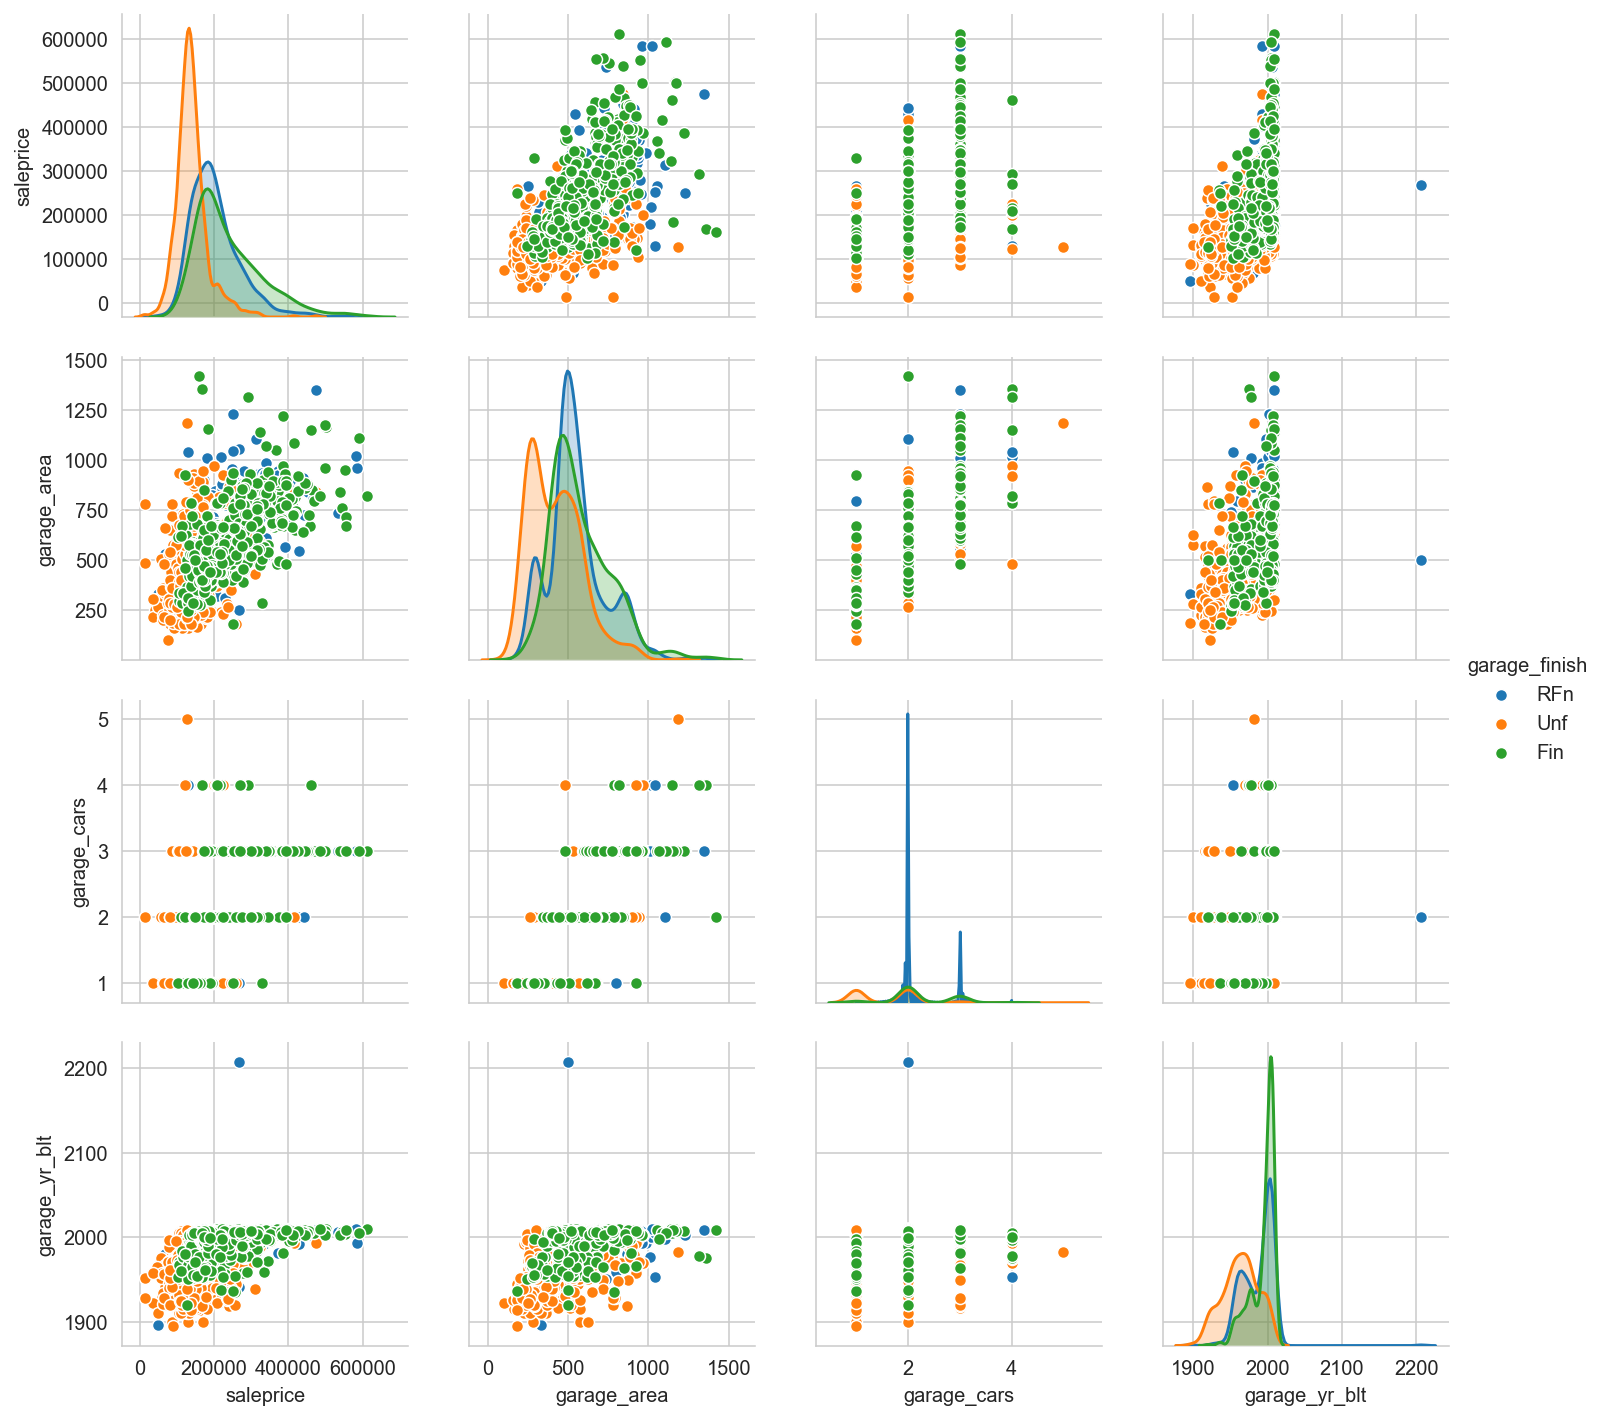

In [17]:
sns.pairplot(garage, hue='garage_finish');

In [18]:
# Making corrections for obvious outliers: 

# Garage built in 2200
housing_df_train.loc[housing_df_train.garage_yr_blt>2019].index
housing_df_train['garage_yr_blt'][1699] = 2007
garage['garage_yr_blt'][1699] = 2007

# Per pair plot, excluding garage_cars in favor of using garage_area
# Plan to include garage_area. 
# Hold Judgement on Garage Year Built until Garage Year Built Analysis. 

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mags/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
# 'saleprice', ,  'garage_cond', 'garage_type', 'garage_finish', 'garage_qual']
housing_df_train.loc[housing_df_train.garage_yr_blt>2019]

garage.groupby('garage_cond').saleprice.mean().sort_values() 
#Expect Po, Fa, TA, Gd, Ex. Ex out of place. Significant difference between Poor and Good

garage_cond
Po     89925.000000
Fa    107387.957447
Ex    124000.000000
TA    188211.900964
Gd    209030.833333
Name: saleprice, dtype: float64

In [20]:
garage.groupby('garage_type').saleprice.mean().sort_values() 
garage[garage.garage_type.isnull()].saleprice.mean() 
# Attached/Built In seems to make a significant difference
garage.groupby('garage_type').garage_type.count()

garage_type
2Types       19
Attchd     1213
Basment      27
BuiltIn     132
CarPort      11
Detchd      536
Name: garage_type, dtype: int64

In [21]:
backup[backup['Garage Type'].isnull()]['Garage Type']

28      NaN
53      NaN
65      NaN
79      NaN
101     NaN
103     NaN
114     NaN
120     NaN
134     NaN
136     NaN
139     NaN
162     NaN
235     NaN
256     NaN
260     NaN
264     NaN
276     NaN
334     NaN
356     NaN
382     NaN
406     NaN
409     NaN
426     NaN
437     NaN
445     NaN
457     NaN
486     NaN
530     NaN
542     NaN
555     NaN
       ... 
1451    NaN
1464    NaN
1511    NaN
1519    NaN
1528    NaN
1544    NaN
1545    NaN
1563    NaN
1564    NaN
1584    NaN
1594    NaN
1634    NaN
1705    NaN
1711    NaN
1736    NaN
1754    NaN
1783    NaN
1788    NaN
1799    NaN
1814    NaN
1841    NaN
1893    NaN
1927    NaN
1952    NaN
1982    NaN
1991    NaN
2010    NaN
2027    NaN
2039    NaN
2042    NaN
Name: Garage Type, Length: 113, dtype: object

In [22]:
# Modifying garage type to binary attached_garage
housing_df_train['attached_garage'] = housing_df_train.garage_type.map(
    {'BuiltIn': 1, 'Attchd': 1, '2Types' : 0, 'Basment' : 0, 'CarPort' : 0, 'Detchd' : 0, None : 0, 'Nan': 0})
housing_df_train['attached_garage'][housing_df_train['attached_garage'].isnull()] = 0

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
garage['attached_garage'] = garage.garage_type.map(
    {'BuiltIn': 1, 'Attchd': 1, '2Types' : 0, 'Basment' : 0, 'CarPort' : 0, 'Detchd' : 0, None : 0, 'Nan': 0})

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
housing_df_train.drop('garage_type', axis=1, inplace = True)

In [25]:
garage.groupby('garage_finish').saleprice.mean().sort_values() 
# Seems to matter a lot as well. 
# garage.groupby('garage_finish').garage_finish.count()
# Evenly distributed also. 
garage.groupby('garage_finish').attached_garage.mean()
# Maps super closely to whether or not the garage is attached. Don't need both. 

garage_finish
Fin    0.948919
RFn    0.941278
Unf    0.373380
Name: attached_garage, dtype: float64

In [26]:
housing_df_train.drop('garage_finish', axis=1, inplace = True)

In [27]:
garage.groupby('garage_qual').saleprice.mean().sort_values() 
# garage qual tracks with price much more strongly than garage_cond. Dropping Garage cond
# garage.groupby('garage_qual').garage_qual.count()
# Majority of the data is for average garages, excluding for now

garage_qual
Po     65000.000000
Fa    116184.890244
TA    188312.700328
Ex    241000.000000
Gd    262989.277778
Name: saleprice, dtype: float64

In [28]:
# # Checking for multicollinearity among categorical variables.
garage = garage.join(pd.get_dummies(garage.garage_finish, drop_first=True))
garage.drop(['saleprice', 'garage_cars','garage_cond', 'garage_qual', 'garage_finish'], axis=1, inplace=True)
garage.head()

garage_area  garage_yr_blt garage_type  attached_garage  RFn  Unf
0        475.0         1976.0      Attchd              1.0    1    0
1        559.0         1997.0      Attchd              1.0    1    0
2        246.0         1953.0      Detchd              0.0    0    1
3        400.0         2007.0     BuiltIn              1.0    0    0
4        484.0         1957.0      Detchd              0.0    0    1

In [29]:
garage.groupby('garage_type').RFn.mean()
garage.groupby('garage_type').Unf.mean()
# don't see multi colinearity b/t garage type and finish. 
garage.groupby('garage_type').garage_yr_blt.mean()
# There may be a multi colinearity with garage type and garage year built.
# Attached garages which appear to be worth significantly more seem to be associated with 
# newer homes. Between this and other year built data being available, excluding year_built
garage.groupby('garage_type').garage_area.mean()
# 2Types expectedly has more area, but they look unrelated enough. 

garage_type
2Types     799.210526
Attchd     527.614180
Basment    435.592593
BuiltIn    567.681818
CarPort    426.818182
Detchd     419.543925
Name: garage_area, dtype: float64

In [30]:
housing_df_train.drop(['garage_cars','garage_cond', 'garage_qual', 'garage_yr_blt'], 
                 axis=1, inplace=True)

#### Garage Variables Conclusion 
- Definitely using in model: 
    - garage_area
- Using modified: 
    - garage_type - Mapped to attached_garage {'BuiltIn': 1, 'Attchd': 1, '2Types' : 0, 'Basment' : 0, 'CarPort' : 0, 'Detchd' : 0, None : 0}
- Probably not using in model: 
    - garage_yr_blt
- Not using in model: 
    - garage_cars
    - garage_cond
    - garage_qual
    - garage_finish

## Size Variables EDA <a name="size"></a>
[back to top](#top)

In [31]:
corr = housing_df_train.corr()
to_delete = corr.index[(corr['saleprice']<0.45) & (corr['saleprice']>-0.45)].tolist()
housing_df_train.drop(to_delete, axis=1, inplace=True)

In [32]:
corr = housing_df_train.corr()
corr.saleprice.sort_values()


fireplaces         0.471093
attached_garage    0.483810
totrms_abvgrd      0.504014
mas_vnr_area       0.512230
full_bath          0.537969
year_remod/add     0.550370
year_built         0.571849
1st_flr_sf         0.618486
total_bsmt_sf      0.628925
garage_area        0.650270
gr_liv_area        0.697038
overall_qual       0.800207
saleprice          1.000000
Name: saleprice, dtype: float64

In [33]:
# Indicators of size also seem important but there are a too many to use 
# and many may be related 

# To simplify the problem, automatically excluding all variables with 
# correlation to saleprice between 0.45 and -0.45

# Checking garage area again in case there is multicolinearity of concern. 

# Listing selected features: 
features_size = ['total_bsmt_sf', '1st_flr_sf', 'house_style', 'gr_liv_area', 'full_bath',
                'totrms_abvgrd', 'garage_area', 'mas_vnr_area', 'fireplaces', 'saleprice']
size = housing_df_train[features_size]

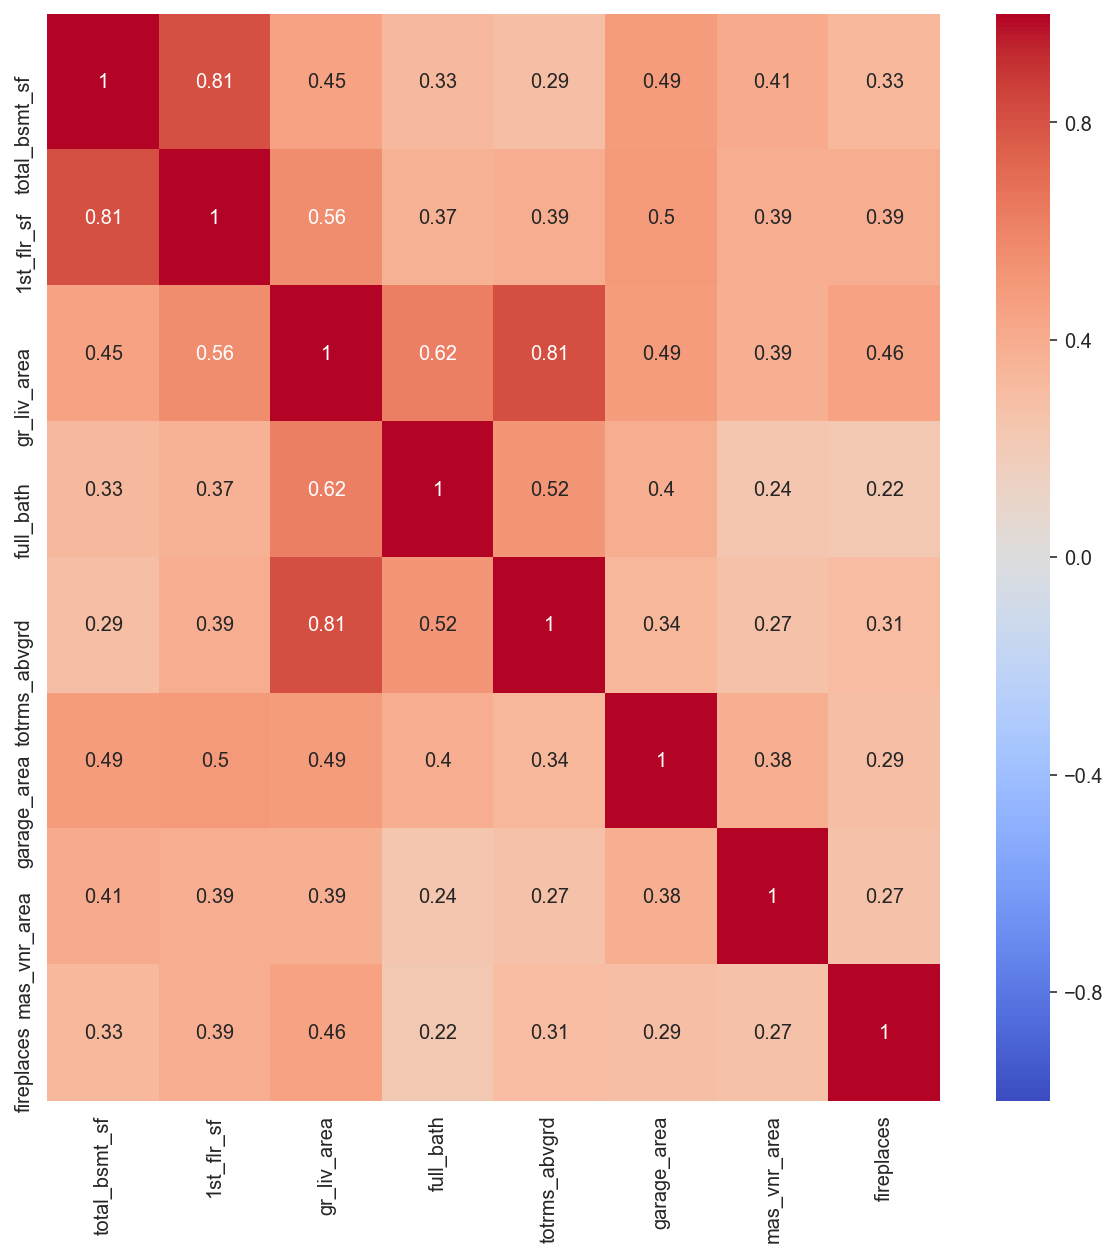

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(size.corr().drop('saleprice',axis=1).drop('saleprice',axis=0), 
            vmin=-1, cmap='coolwarm', annot=True)

In [35]:
# Removing 'totrms_abvgrd' bc it is strongly correlated with 'gr_living_area'
# and a worse indicator of price. 
housing_df_train.drop('totrms_abvgrd', axis=1, inplace=True)
size.drop('totrms_abvgrd', axis=1, inplace=True)

/Users/mags/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
# Only need one of total_bsmt_sf and 1st_flr_sf because of their correlation 
# Each have essentially the same correlation to saleprice. 

# To select which to use, I just ran a bunch of regressions to see which one
# got better scores with different variable pairings

# Conclusions: 
# Variables were a total wash for one another. I'm opting to drop 1st_flr_sf
# because there's a large subset of the data that has a 1:1 relationship with gr_liv_area 

housing_df_train.drop('1st_flr_sf', axis=1, inplace=True)
size.drop('1st_flr_sf', axis=1, inplace=True)

In [37]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm

In [38]:
size['overall_qual'] = housing_df_train['overall_qual']
size['year_built'] = housing_df_train['year_built']
size.dropna(inplace=True)
X_compare_1 = size[['gr_liv_area', 'overall_qual', 
                    'total_bsmt_sf', 'garage_area', 'year_built']]

y_compare_1 = size['saleprice']

lr_compare_1 = LinearRegression()
lr_compare_1.fit(X_compare_1, y_compare_1)


model_compare_1 = sm.OLS(y_compare_1,X_compare_1).fit()
model_compare_1.summary()

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:12:47   Log-Likelihood:                -24242.
No. Observations:                2027   AIC:                         4.849e+04
Df Residuals:                    2022   BIC:                         4.852e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
gr_liv_area      43.4201      2.127     20.418      0.000      39.250      47.591
overall_qual   2.509e+04    833.886     30.089      0.000    2.35e+04    2.67e+04
total_bsmt_sf    30.2880      2.347     12.903      0.000      25.684      34.892
garage_area      66.5532      4.983     13.357      0.000      56.781      76.325
year_built      -50.9876      1.978    -25.772      0.000     -54.868     -47.108
==============================================================================
Omnibus:                      809.076   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64417.848
Skew:                          -0.973   Prob(JB):                         0.00
Kurtosis:                      30.549   Cond. No.                     2.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# X_compare_2 = size[['gr_liv_area', 'overall_qual', 
#                     '1st_flr_sf', 'garage_area', 'year_built']]

# y_compare_2 = size['saleprice']

# lr_compare_2 = LinearRegression()
# lr_compare_2.fit(X_compare_2, y_compare_2)
# y1_pred_mlr = lr_compare_2.predict(X_compare_2)

# model_compare_2 = sm.OLS(y_compare_2,X_compare_2).fit()
# model_compare_2.summary()



In [40]:
# Saving out a prediction file to learn how to make a submission

X_test = housing_df_test[['gr_liv_area', 'overall_qual', 
                     'total_bsmt_sf', 'garage_area', 'year_built']]

y_pred_mlr_test = lr_compare_1.predict(X_test)
y1_pred_mlr = lr_compare_1.predict(X_compare_1)

y_test_df = pd.DataFrame()
y_test_df['Id'] = housing_df_test['id']
y_test_df['SalePrice'] = y_pred_mlr_test
y_test_df.to_csv('./datasets/Siboni_sub_regression_2.csv')

In [41]:
size.drop(['year_built', 'overall_qual'], axis=1, inplace=True)

/Users/mags/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


/Users/mags/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mags/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


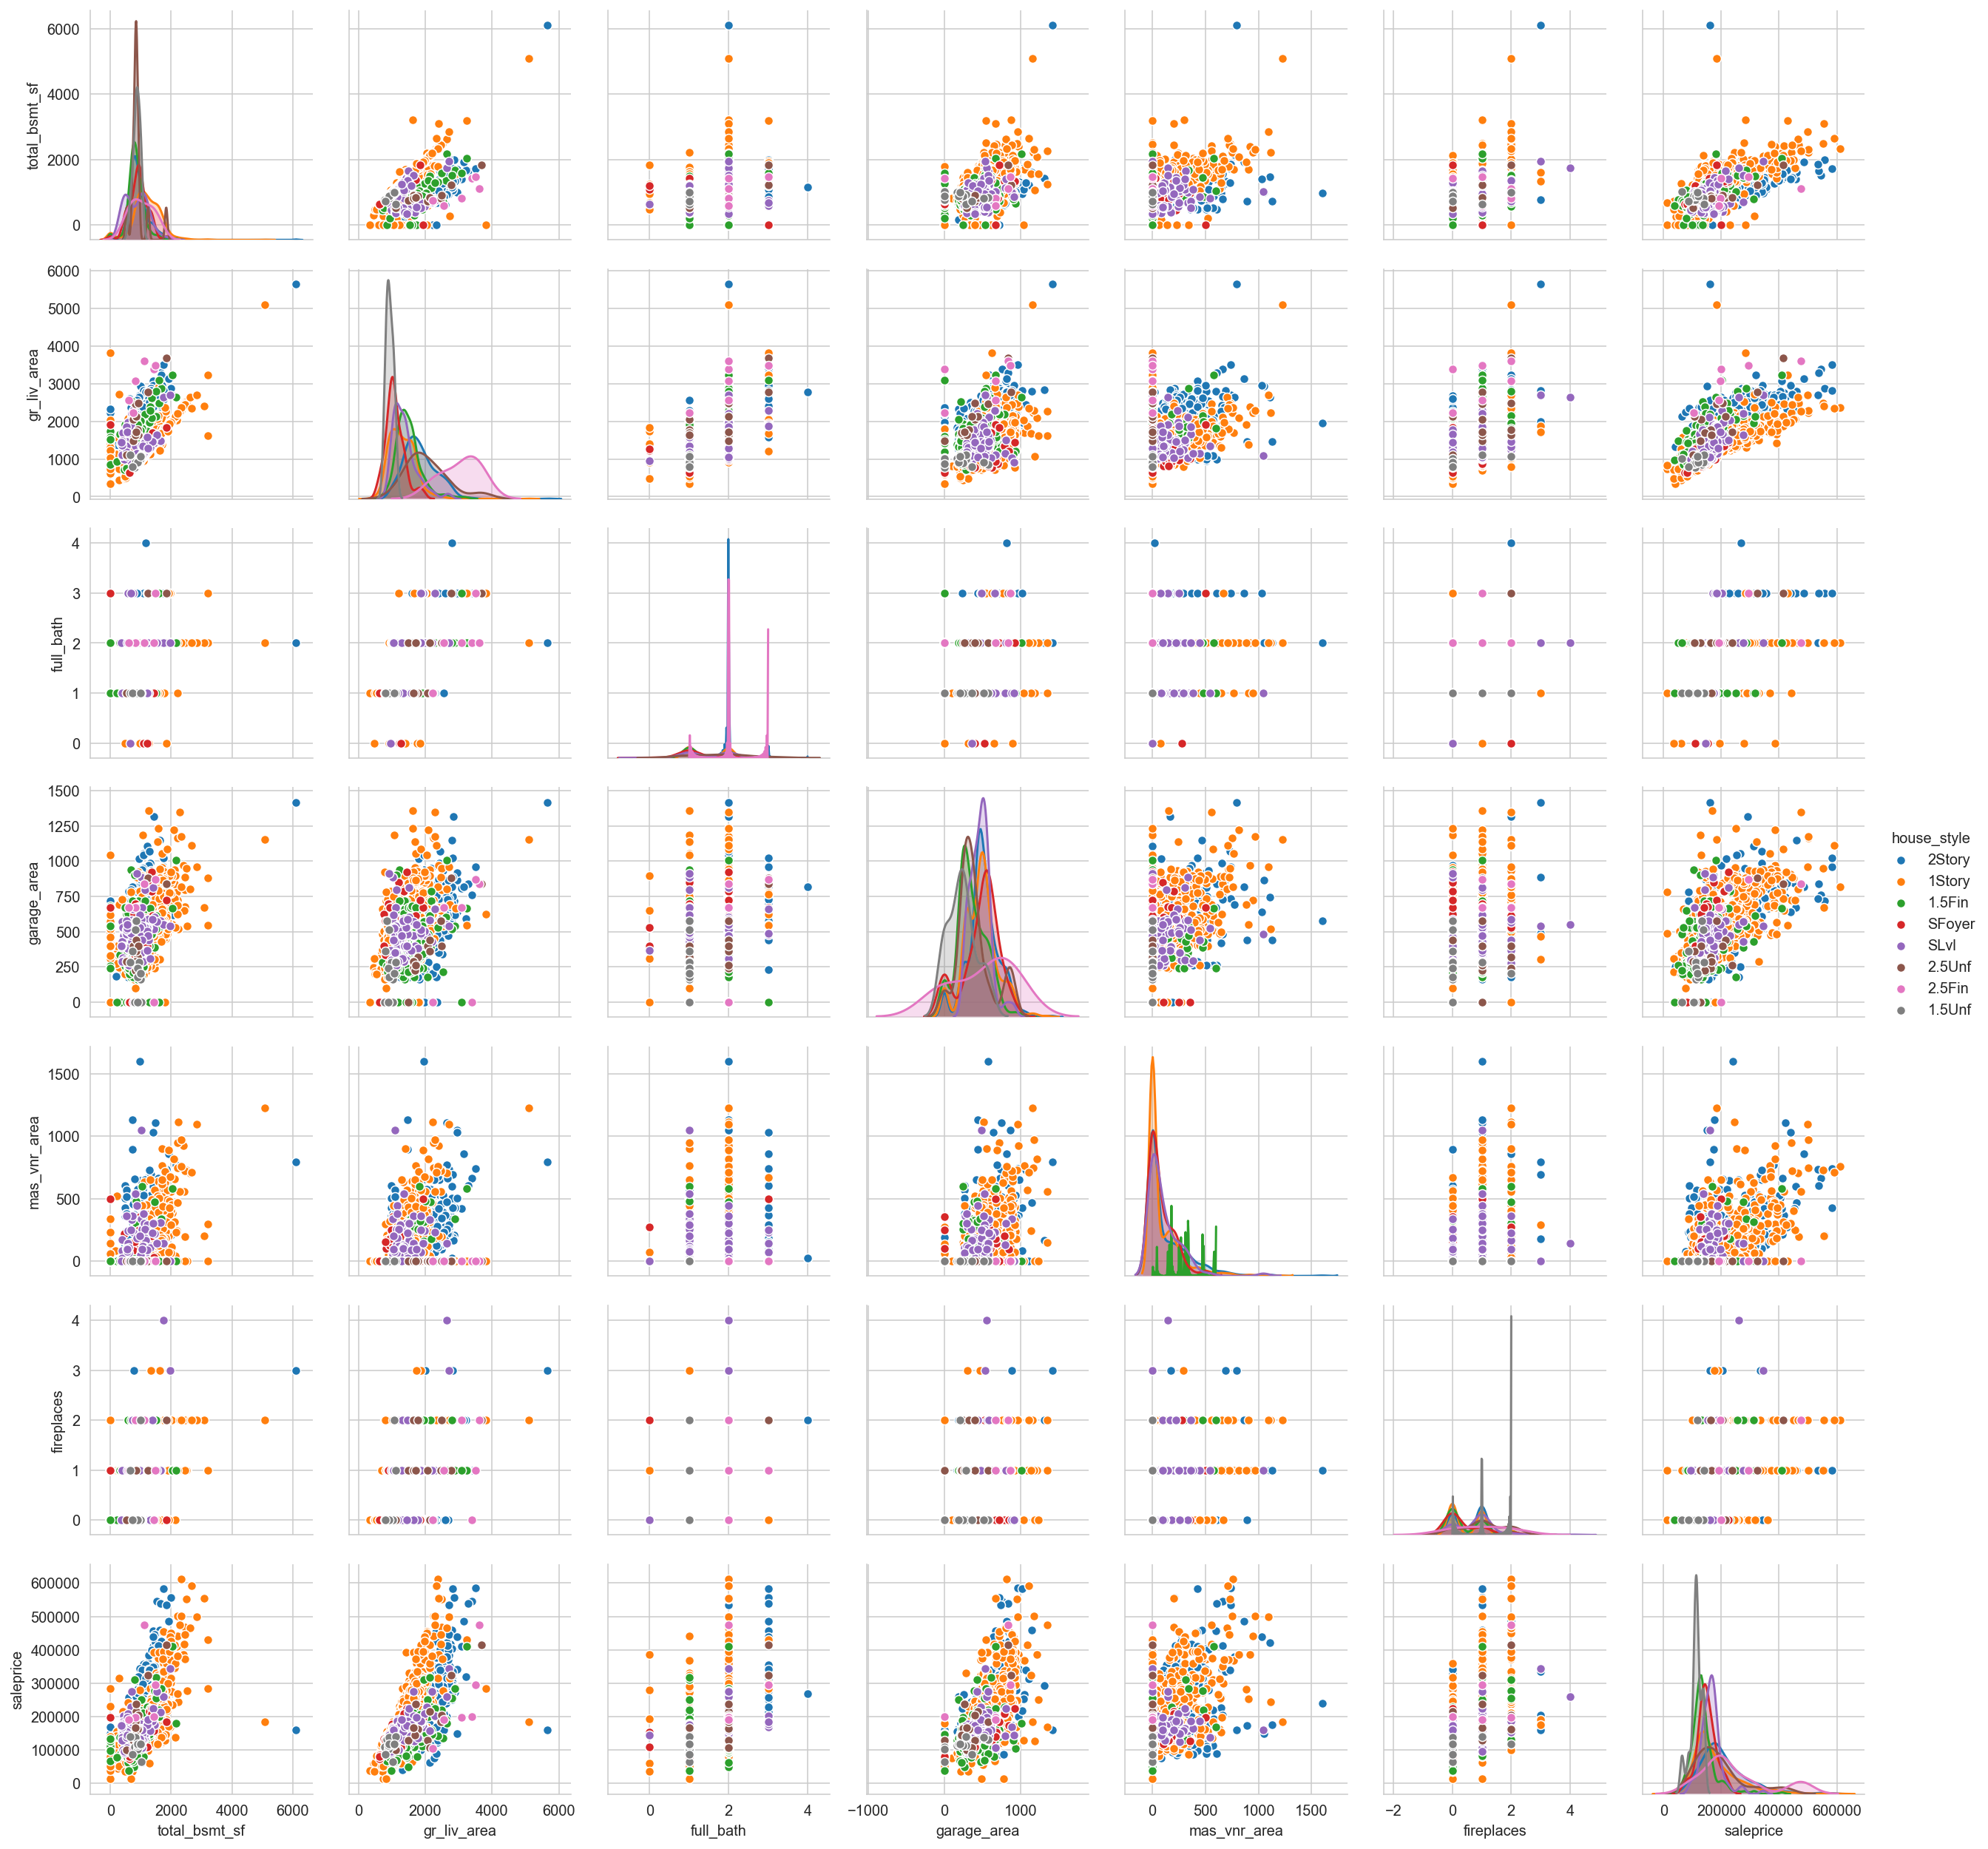

In [42]:
sns.pairplot(size, hue='house_style');

In [43]:
# Deleting two outlier rows with largest 1st_flr_sf and mid range sale price and mid range num baths
# Nothing indicates the data is wrong, but I don't want outliers driving things
size.sort_values('total_bsmt_sf', ascending=False).head(2)
size.drop([1885, 960], inplace=True)
housing_df_train.drop([1885, 960], inplace=True)



/Users/mags/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
size.groupby('house_style').saleprice.mean()

house_style
1.5Fin    136480.091743
1.5Unf    112466.666667
1Story    179220.973206
2.5Fin    243666.666667
2.5Unf    191785.714286
2Story    206112.095400
SFoyer    149343.920000
SLvl      166257.043011
Name: saleprice, dtype: float64

In [45]:
size.groupby('house_style').saleprice.count()

house_style
1.5Fin     218
1.5Unf      12
1Story    1045
2.5Fin       6
2.5Unf      14
2Story     587
SFoyer      50
SLvl        93
Name: saleprice, dtype: int64

In [46]:
# Opting to drop House Style
# The distribution is sort of distributed and there seems to be some signal from it affecting house price
# but it just does not seem as useful as other variables. 

housing_df_train.drop(['house_style'], axis=1, inplace=True)

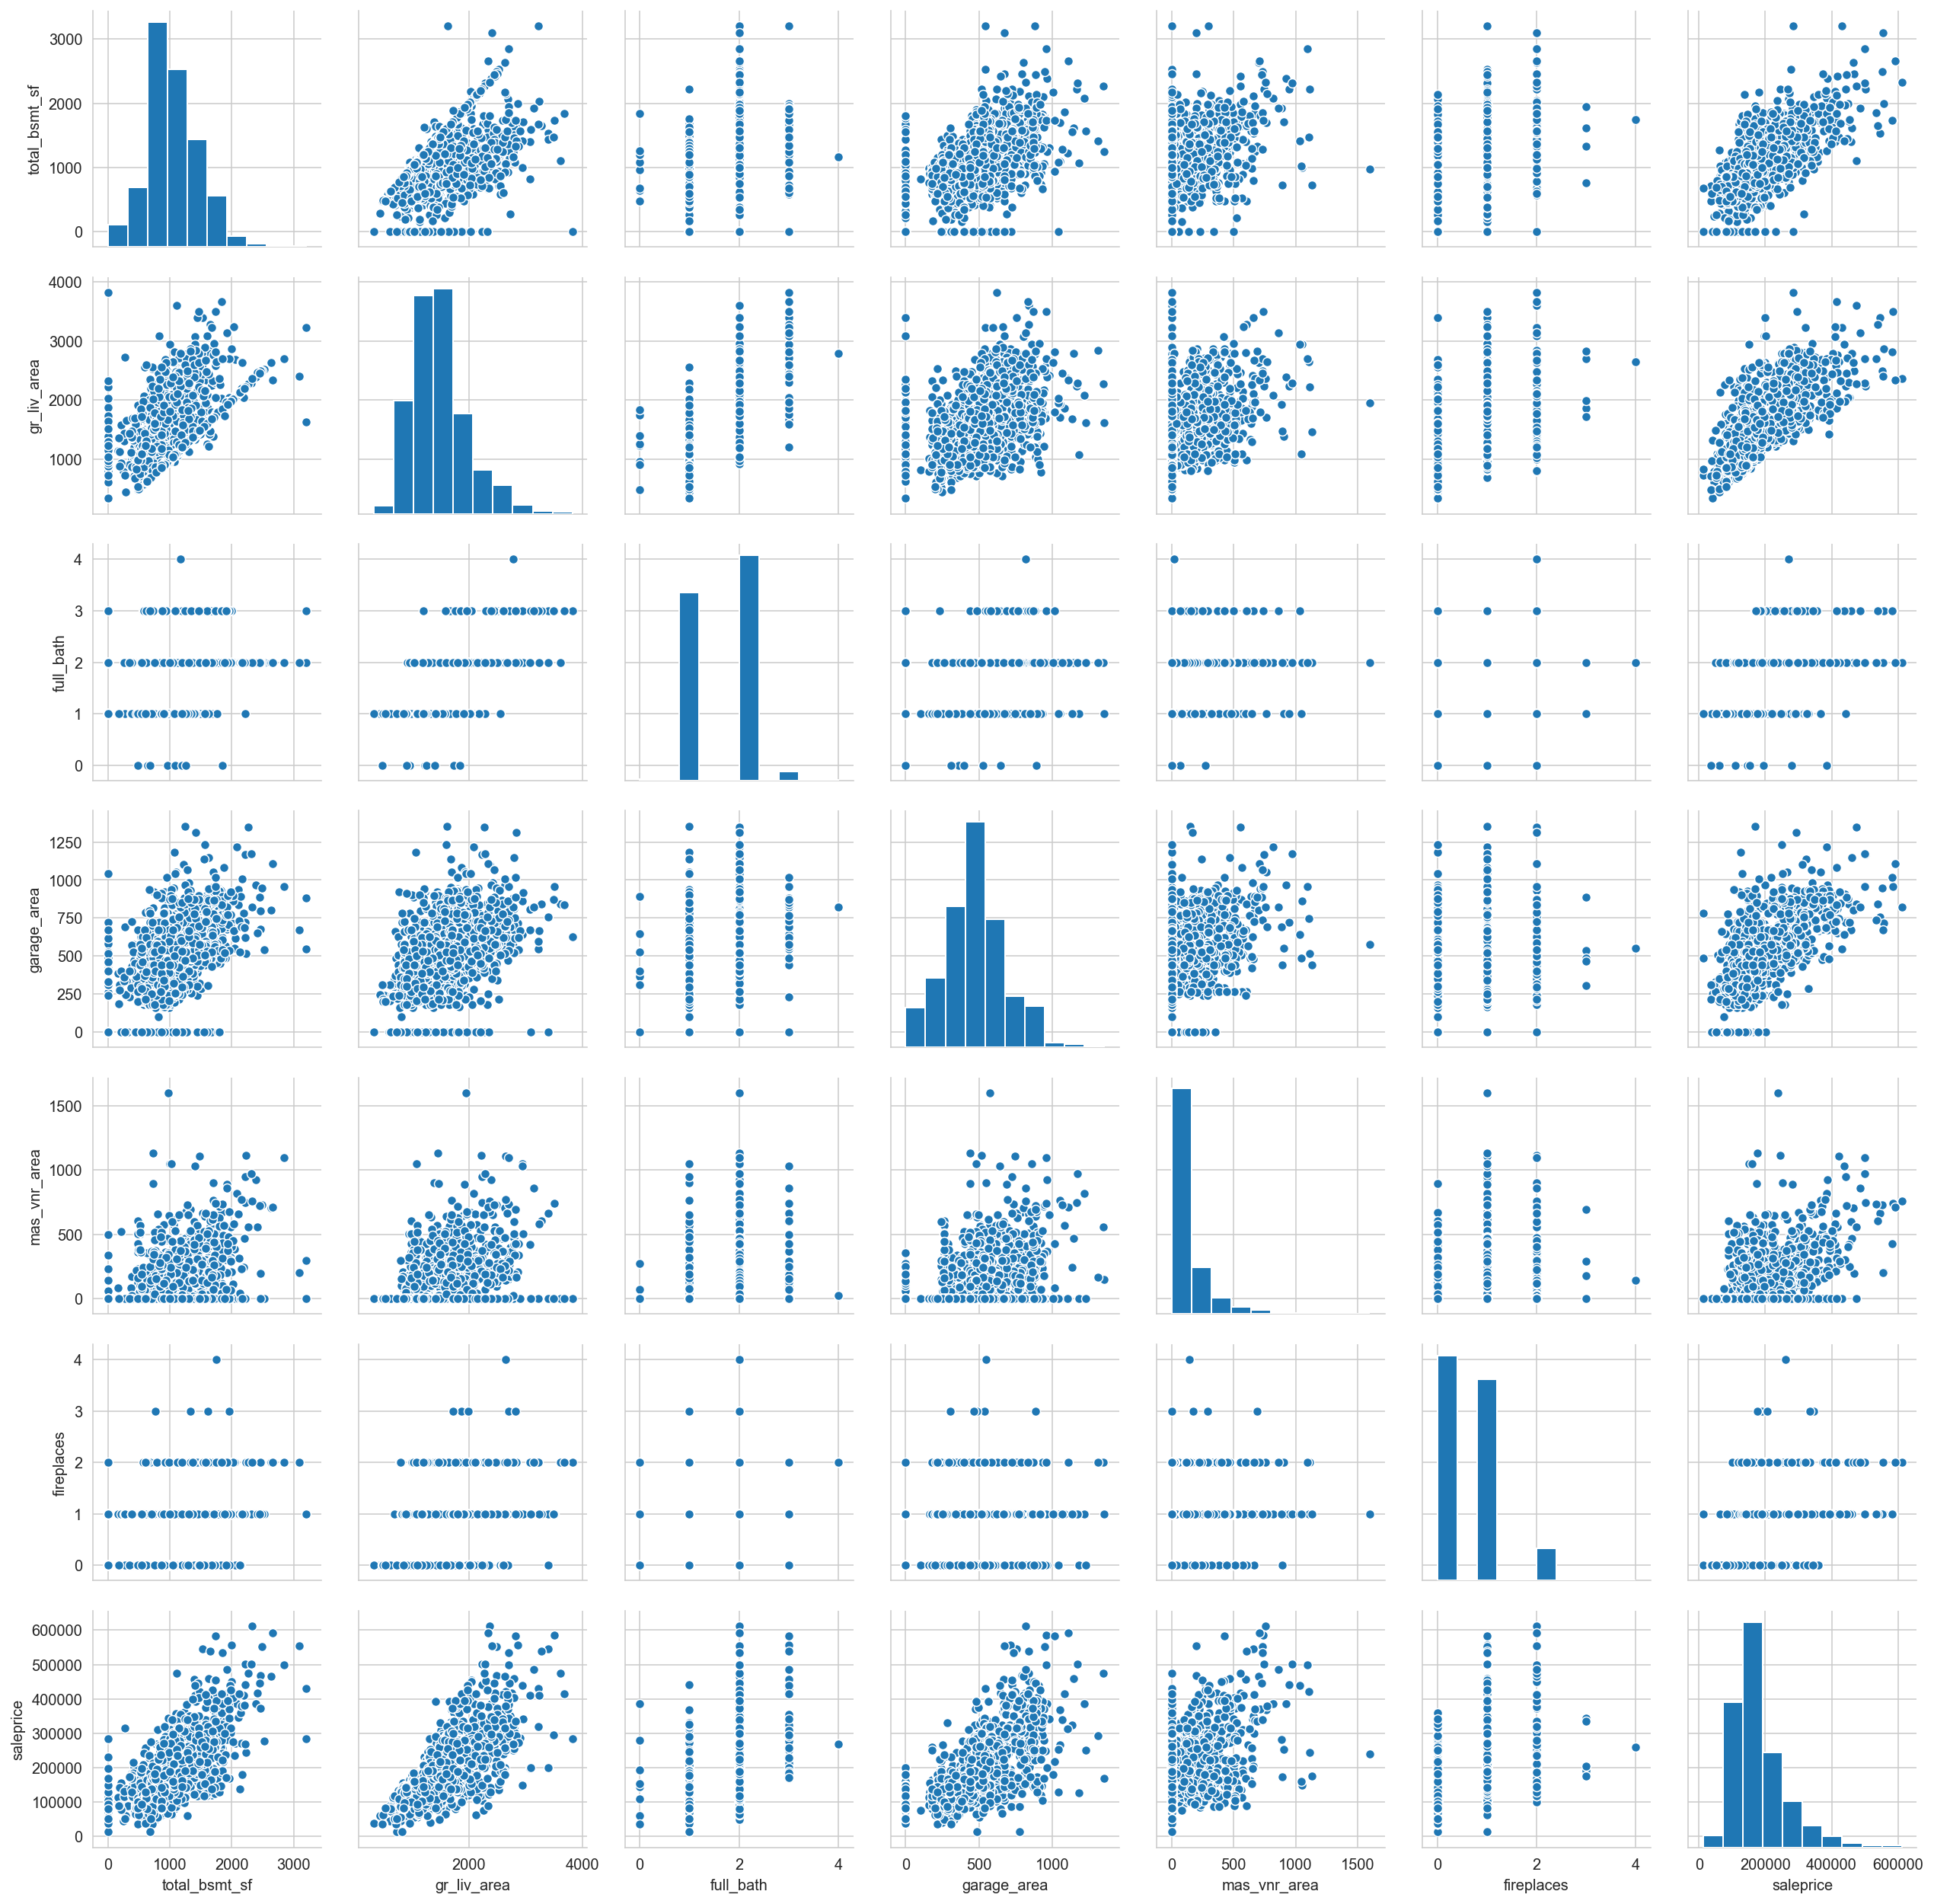

In [47]:
sns.pairplot(size);

In [48]:
# Fireplaces seems to be interesting but given that the majority of the homes have 0 or 1 fireplaces, 
# choosing to exclude. 

housing_df_train.drop(['fireplaces'], axis=1, inplace=True)

#### Size Variables Conclusion 
- Definitely using in model: 
    - gr_liv_area
    - garage_area
- Probably using in model: 
    - total_bsmt_sf
    - mas_vnr_area
- Probably not using in model: 
    - full_bath
    - fireplaces
- Not using in model: 
    - totrms_abvgrd
    - house_style
    - 1st_flr_sf

In [49]:
housing_df_train.columns

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'overall_qual', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'total_bsmt_sf', 'heating',
       'heating_qc', 'central_air', 'electrical', 'gr_liv_area', 'full_bath',
       'kitchen_qual', 'functional', 'fireplace_qu', 'garage_area',
       'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'sale_type',
       'saleprice', 'attached_garage'],
      dtype='object')

## Quality Variables EDA<a name="quality"></a>
[back to top](#top)

Overall quality has the strongest correlation to price of the quantitative variables available. 

It is likely strongly correlated to the other quality variables. Want to visualize which variables are strongly correlated to price but weakly correlated to overall quality. Then we want to pick 1-2 to keep and use in the model. 

Also, filtering out the quality variables that don't "feel" like they mean the same thing as quality.

In [50]:
features_quality = ['overall_qual', 'exter_qual', 'exter_cond', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2',
                   'kitchen_qual', 'functional', 'fireplace_qu', 'pool_qc', 'fence', 'saleprice']
quality = housing_df_train[features_quality]

In [51]:
quality.head()

overall_qual exter_qual exter_cond bsmt_cond bsmtfin_type_1 bsmtfin_type_2  \
0             6         Gd         TA        TA            GLQ            Unf   
1             7         Gd         TA        TA            GLQ            Unf   
2             5         TA         Gd        TA            GLQ            Unf   
3             5         TA         TA        TA            Unf            Unf   
4             6         TA         TA        Gd            Unf            Unf   

  kitchen_qual functional fireplace_qu pool_qc fence  saleprice  
0           Gd        Typ          NaN     NaN   NaN     130500  
1           Gd        Typ           TA     NaN   NaN     220000  
2           Gd        Typ          NaN     NaN   NaN     109000  
3           TA        Typ          NaN     NaN   NaN     174000  
4           TA        Typ          NaN     NaN   NaN     138500

In [52]:
# Creating a df of quantitative variables already decided to include to compare above qualitative data to.. 
features_quant = housing_df_train._get_numeric_data().columns
quant = housing_df_train[features_quant]

In [53]:
quant.head()
# removing variables not yet assessed or assessed to be less likely to influence a good model 
# for the sake of simplicity:
quant.drop(['year_remod/add', 'mas_vnr_area', 'total_bsmt_sf', 'full_bath', 'garage_area'], axis =1, inplace=True)

In [54]:
quant.head()

overall_qual  year_built  gr_liv_area  saleprice  attached_garage
0             6        1976         1479     130500              1.0
1             7        1996         2122     220000              1.0
2             5        1953         1057     109000              0.0
3             5        2006         1444     174000              1.0
4             6        1900         1445     138500              0.0

In [55]:
# Pasting features columns for reference: 
# features_quality = ['overall_qual', 'exter_qual', 'exter_cond', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2',
#                    'kitchen_qual', 'functional', 'fireplace_qu', 'pool_qc', 'fence', 'saleprice']
quant_qual = quant.join(quality.drop(['overall_qual', 'saleprice'], axis=1), how='outer')

In [56]:
# Checking distribution and mean of each category to see what I can ignore:

quality.groupby('exter_qual').saleprice.count()
# 79, 697, 1247, 26
quality.groupby('exter_qual').saleprice.mean()

quality.groupby('exter_cond').saleprice.count()
# 7, 215, 1776, 49, 2
quality.groupby('exter_cond').saleprice.mean()

# Appears to make a big impact on price. Checked as hues in sns plot below,
# exter_qual appears very correlated to year built and overall qual. 

exter_cond
Ex    236263.857143
Fa    102507.693878
Gd    167623.023256
Po     44800.000000
TA    185273.217342
Name: saleprice, dtype: float64

In [57]:
# Conclusion: drop exter_qual, keep exter_cond. Currently mapping to 5 variables. 
# Decide later whether to set as dummy variable; to break in to fewer options. 

housing_df_train.drop('exter_qual', axis=1, inplace= True)
housing_df_train['exter_cond'] = housing_df_train.exter_cond.map(
    {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})

In [58]:
# Checking distribution and mean of each category to see what I can ignore:

quality.groupby('bsmt_cond').saleprice.count()
# 3, 89, 1832, 65, 5
quality.groupby('bsmt_cond').saleprice.mean()

quality.groupby('bsmtfin_type_1').saleprice.count()
quality.bsmtfin_type_1.isnull().sum()
quality.groupby('bsmtfin_type_2').saleprice.mean()
quality[quality.bsmtfin_type_2.isnull()].saleprice.mean()
# 613, 293, 200, 183, 102, 603; isnull() -> 55

quality.groupby('bsmtfin_type_2').saleprice.count()
quality.bsmtfin_type_2.isnull().sum()
quality.groupby('bsmtfin_type_2').saleprice.mean()
quality[quality.bsmtfin_type_2.isnull()].saleprice.mean()
# 23, 35, 48, 80, 60, 1747; isnull() -> 56
# seems to only matter if it does or doesn't have a basement



109513.82142857143

In [59]:
backup.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [60]:
# Conclusion: Drop 3 indicators. Make a has basement indicator in place. 

housing_df_train['has_basement'] = housing_df_train.bsmtfin_type_1.isnull()
housing_df_train['has_basement'] = housing_df_train.has_basement.map(
    {False : 1, True : 0})

housing_df_train.drop(['bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2'], axis=1, inplace= True)

In [61]:
quality.groupby('kitchen_qual').saleprice.count()
quality.groupby('kitchen_qual').saleprice.mean()
# 149, 806, 1047, 47

kitchen_qual
Ex    338632.510067
Fa    101334.957447
Gd    211629.451613
TA    139501.607450
Name: saleprice, dtype: float64

In [62]:
# Seems pretty significant - keeping for now. Seems to correlate to year built a bit though. 

# Mapping to 4 variables
housing_df_train['kitchen_qual'] = housing_df_train.kitchen_qual.map(
    {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1})

In [63]:
quality.groupby('functional').saleprice.count()
quality.groupby('functional').saleprice.mean()
# Counts: 1913, 42, 42, 29, 12, 7, 2, 2

functional
Maj1    163106.166667
Maj2     87157.714286
Min1    154429.761905
Min2    150424.571429
Mod     148108.724138
Sal      31550.000000
Sev      95750.000000
Typ     183967.326189
Name: saleprice, dtype: float64

In [64]:
# Not a strong indicator; excluding 
housing_df_train.drop(['functional'], axis=1, inplace= True)

In [65]:
quality.groupby('fireplace_qu').saleprice.count()
quality.fireplace_qu.isnull().sum()
# 31, 521, 407, 59, 31; isnull() --> 1000
quality.groupby('fireplace_qu').saleprice.mean()
# quality[quality.fireplace_qu.isnull()].saleprice.mean()

fireplace_qu
Ex    331481.483871
Fa    170287.203390
Gd    233815.061420
Po    139263.967742
TA    204893.621622
Name: saleprice, dtype: float64

In [66]:
# Conclusions: a bad fireplace is worse than no fireplace at all. 
# Most of the data is for Gd/TA and those are pretty similar in average price. Dropping column. 

housing_df_train.drop(['fireplace_qu'], axis=1, inplace= True)

In [67]:
quality.groupby('pool_qc').saleprice.count().sum()
quality.pool_qc.isnull().sum()

2041

In [68]:
# Conclusion: not enough pools to do anything meaningful with; dropping 
housing_df_train.drop(['pool_qc'], axis=1, inplace= True)

In [69]:
quality.groupby('fence').saleprice.count()
quality.groupby('fence').saleprice.mean()

quality[quality.fence.isnull()].saleprice.mean()

188578.95573074592

In [70]:
# fence quality/existence appears to tell us almost nothing about saleprice. Dropping
housing_df_train.drop(['fence'], axis=1, inplace= True)

/Users/mags/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mags/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


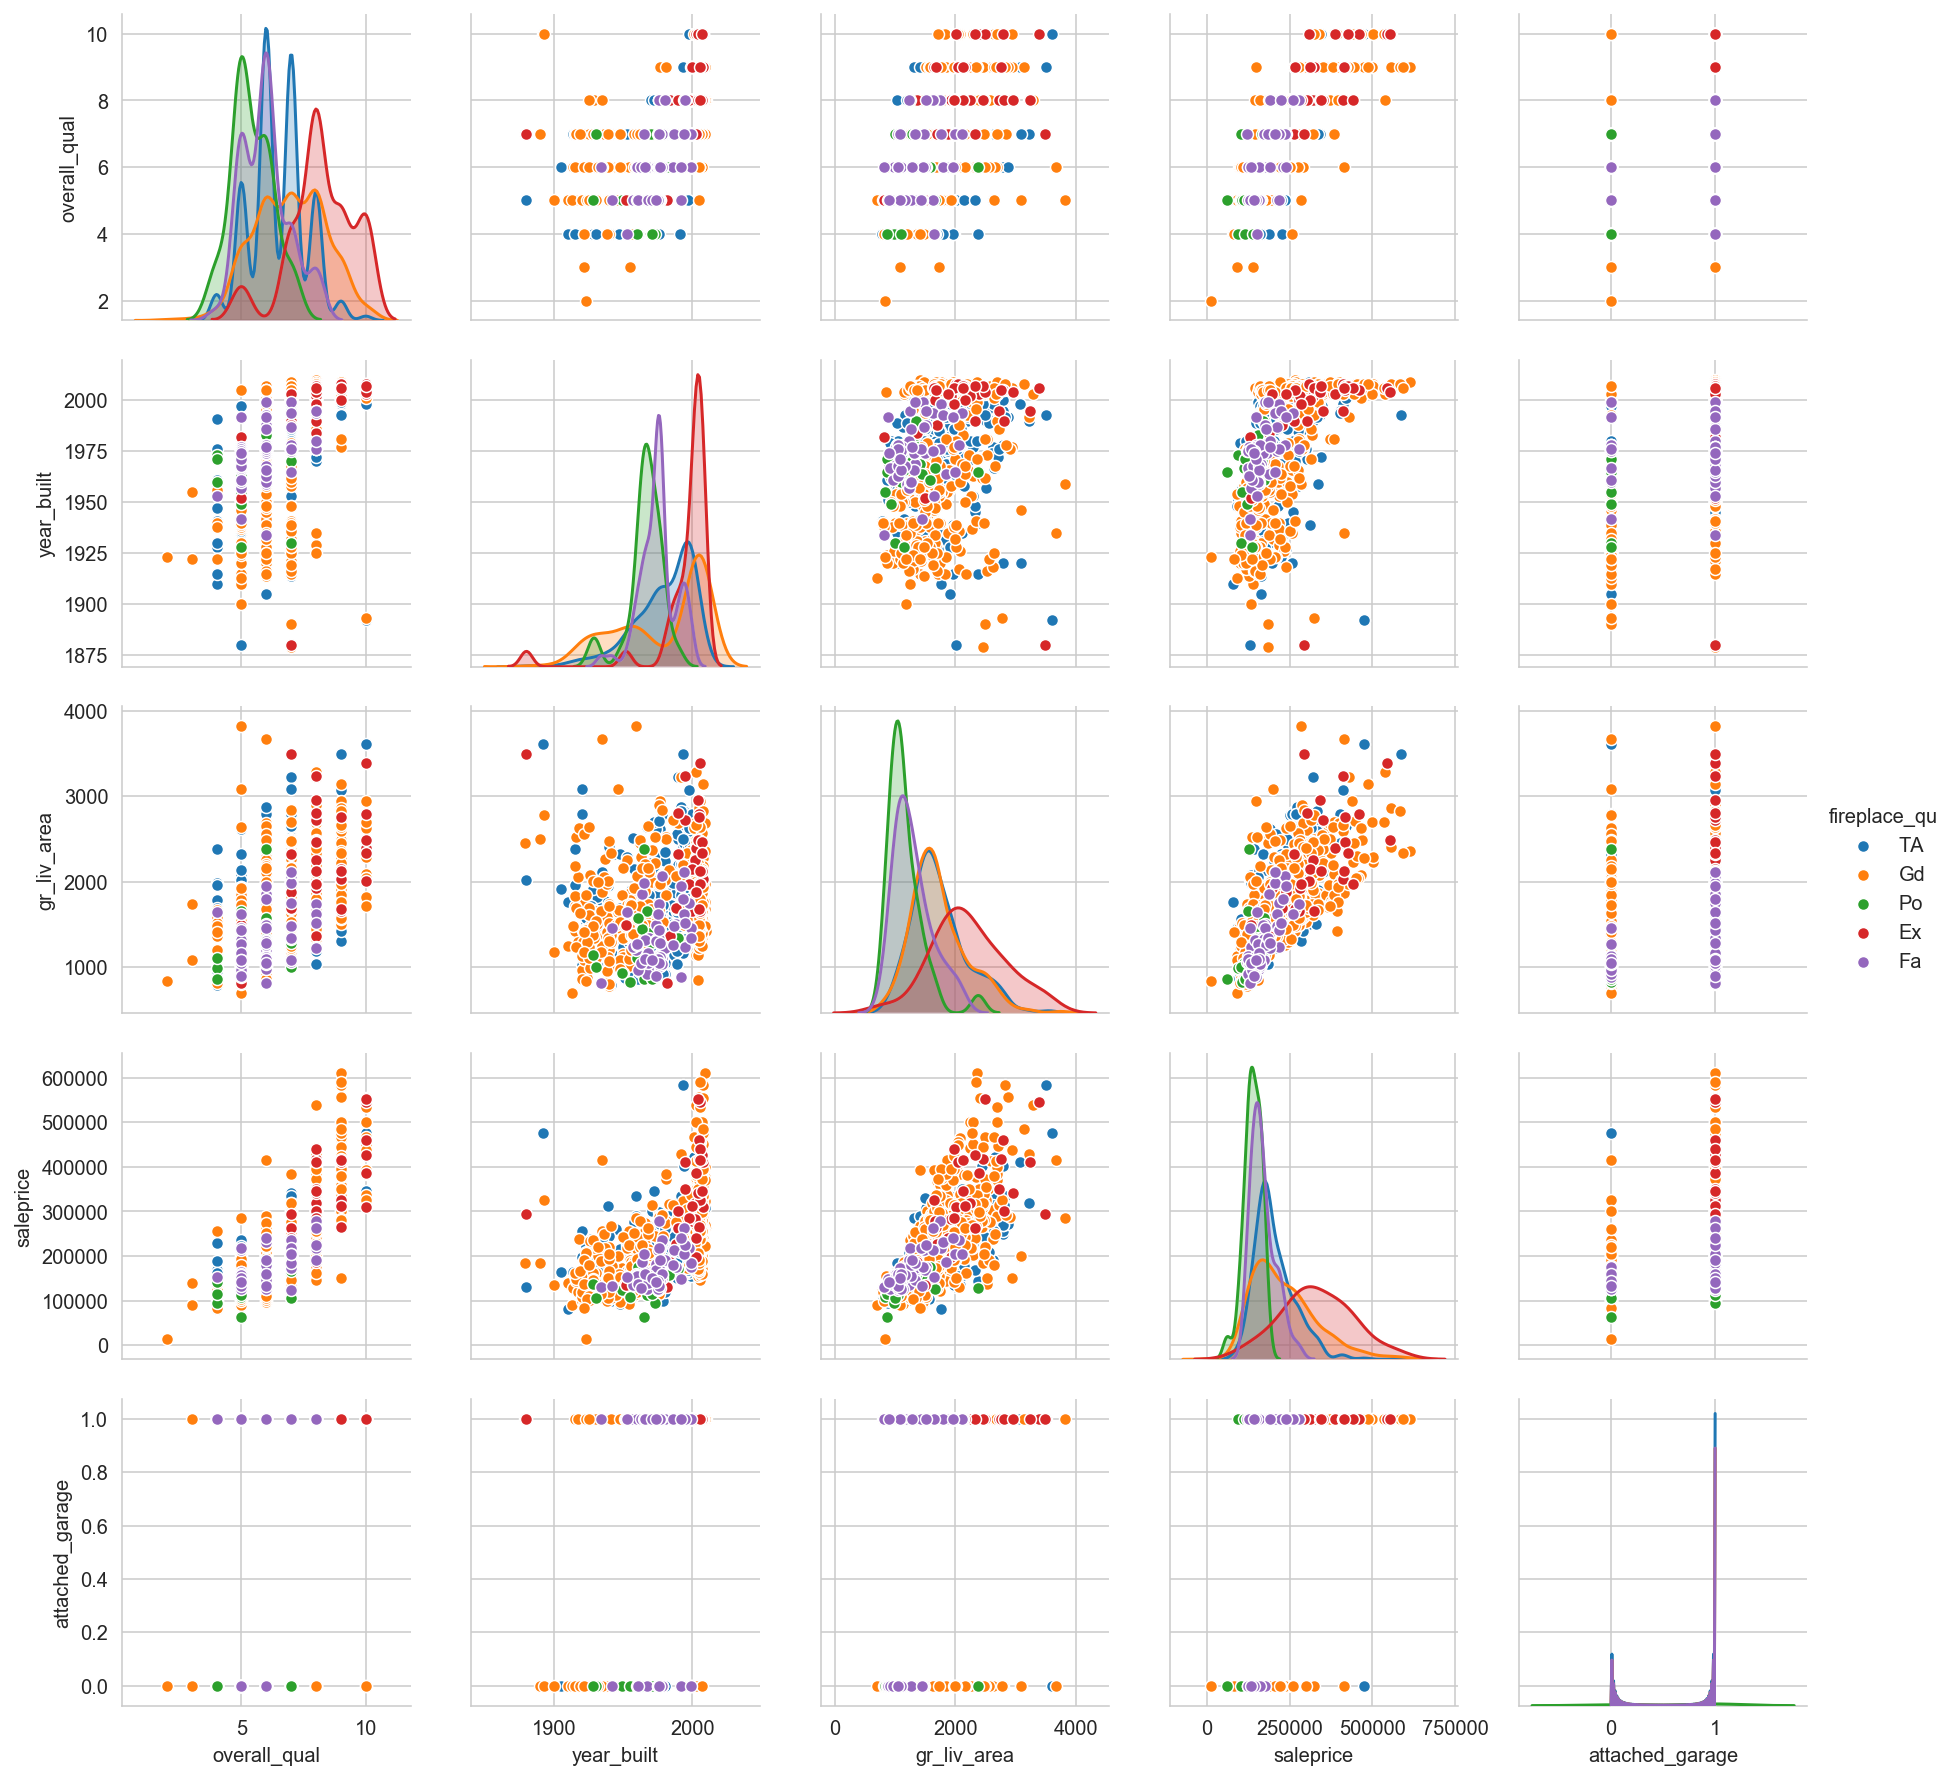

In [71]:
# Set the hue to various features above when I was unsure whether or not to include. 
sns.pairplot(quant_qual, hue ='fireplace_qu');

#### Quality Variables Conclusion 
- Definitely using in model: 
    - overall qual
- Using modified in model: 
    - kitchen_qual - Mapped {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1}
    - bsmtfin_type_1  - Mapped to 'has_basement' Yes = 1, No = 0
    - exter_cond - Mapped to {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1}
- Not using in model: 
    - fireplace_qu
    - pool_qc
    - fence
    - functional
    - bsmt_cond
    - bsmtfin_type_2
    - exter_qual

In [72]:
#attached_garage data missing. dunno how it got lost. adding back. 

In [73]:
housing_df_train['attached_garage'] = garage['attached_garage']

## Access Variables EDA<a name="access"></a>

[back to top](#top)

In [74]:
features_access = ['street', 'alley', 'condition_1', 'condition_2', 
                   'paved_drive', 'saleprice']
access = housing_df_train[features_access]

In [75]:
features_quant = ['saleprice', 'overall_qual', 'year_built', 'gr_liv_area', 'total_bsmt_sf']
quant = housing_df_train[features_quant]

In [76]:
quant_acc = quant.join(access.drop(['saleprice'], axis=1), how='outer')

In [77]:
quant_acc.head()

saleprice  overall_qual  year_built  gr_liv_area  total_bsmt_sf street  \
0     130500             6        1976         1479          725.0   Pave   
1     220000             7        1996         2122          913.0   Pave   
2     109000             5        1953         1057         1057.0   Pave   
3     174000             5        2006         1444          384.0   Pave   
4     138500             6        1900         1445          676.0   Pave   

  alley condition_1 condition_2 paved_drive  
0   NaN        RRAe        Norm           Y  
1   NaN        Norm        Norm           Y  
2   NaN        Norm        Norm           Y  
3   NaN        Norm        Norm           Y  
4   NaN        Norm        Norm           N

In [78]:
access.isnull().sum()

street            0
alley          1909
condition_1       0
condition_2       0
paved_drive       0
saleprice         0
dtype: int64

In [79]:
access.groupby('street').saleprice.count()

access.groupby('street').saleprice.mean()

street
Grvl     86901.428571
Pave    181803.231146
Name: saleprice, dtype: float64

In [80]:
# Count for gravel is only 7, can't get signal from this variable. 
# difference in mean sale price between null and non null values too small to be useful

housing_df_train.drop(['street'], axis=1, inplace= True)

In [81]:
access.groupby('alley').saleprice.count()
access.groupby('alley').saleprice.mean()
#access[access.alley.isnull()].saleprice.mean()

alley
Grvl    120835.635294
Pave    174534.709091
Name: saleprice, dtype: float64

In [82]:
# Null values have highest mean but are close to pavement values. 
# Choosing to also exclude.

housing_df_train.drop(['alley'], axis=1, inplace= True)

In [83]:
access.groupby('condition_1').saleprice.count()
# 86% of values 'normal'
access.groupby('condition_1').saleprice.mean()

condition_1
Artery    128765.000000
Feedr     143068.268519
Norm      185007.965459
PosA      254733.333333
PosN      254794.296296
RRAe      139685.714286
RRAn      172604.777778
RRNe      129616.666667
RRNn      198208.333333
Name: saleprice, dtype: float64

In [84]:
# There aren't many PosA or PosN homes but this changes price enough that I am goign to map
# an off site feature variable: 
housing_df_train['offsite_feature'] = housing_df_train.condition_1.map(
    {'Artery' : 0, 'Feedr' : 0, 'Norm' : 0, 
     'PosA' : 1, 'PosN' : 1, 'RRAe' : 0, 'RRAn' : 0, 
     'RRNe' : 0, 'RRNn' : 0})

In [85]:
housing_df_train.drop(['condition_1'], axis=1, inplace= True)

In [86]:
access.groupby('condition_2').saleprice.count()
# 98% of values 'normal'
# access.groupby('condition_2').saleprice.mean()

condition_2
Artery       5
Feedr       11
Norm      2023
PosA         3
PosN         3
RRAe         1
RRAn         1
RRNn         2
Name: saleprice, dtype: int64

In [87]:
# off site features matter even more here but the sample size is now 6. Dropping.
housing_df_train.drop(['condition_2'], axis=1, inplace= True)

In [88]:
access.groupby('paved_drive').saleprice.count()
# 91% paved
access.groupby('paved_drive').saleprice.mean()

paved_drive
N    104562.827815
P    129824.461538
Y    188810.310382
Name: saleprice, dtype: float64

In [89]:
# Paved driveway makes a difference. Partially paved doesn't seem to matter much. 
# mapping this to fully paved = 1, not fully paved = 0
housing_df_train['paved_drive'] = housing_df_train.paved_drive.map(
    {'N' : 0, 'P' : 0, 'Y' : 1})

#### Access Variables Conclusion 
- Using modified in model: 
    - condition_1  - Mapped to 'offsite_feature' Yes = 1, No = 0
    - paved_drive - Mapped to {'N' : 0, 'P' : 0, 'Y' : 1}
- Not using in model: 
    - street
    - alley
    - condition_2

## Land Variables EDA<a name="land"></a>

[back to top](#top)

In [90]:
features_land = ['ms_zoning', 'lot_shape', 'land_contour', 'lot_config', 'land_slope',
                   'bldg_type', 'foundation', 'bsmt_qual', 'bsmt_exposure', 
                 'saleprice']
land = housing_df_train[features_land]

In [91]:
quant_land = quant.join(land.drop(['saleprice'], axis=1), how='outer')

In [92]:
land.isnull().sum()

ms_zoning         0
lot_shape         0
land_contour      0
lot_config        0
land_slope        0
bldg_type         0
foundation        0
bsmt_qual        55
bsmt_exposure    58
saleprice         0
dtype: int64

In [143]:
land.groupby('ms_zoning').saleprice.count()
# RL = 1596, RM = 316, FV = 101, others 19 or fewer
land.groupby('ms_zoning').saleprice.mean()

ms_zoning
A (agr)     47300.000000
C (all)     78010.894737
FV         218618.316832
I (all)     57625.000000
RH         148859.571429
RL         191259.362782
RM         129119.142405
Name: saleprice, dtype: float64

In [94]:
# mapping to three dummy variables - 
#'residential_low', 'floating_village', and 'residential_other'
housing_df_train['residential_low'] = housing_df_train.ms_zoning.map(
    {'RL' : 1, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 0, 'I (all)' : 0, 'RH' : 0, 'RM' : 0})

In [95]:
housing_df_train['residential_other'] = housing_df_train.ms_zoning.map(
    {'RL' : 0, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 0, 'I (all)' : 0, 'RH' : 1, 'RM' : 1})

In [96]:
housing_df_train['floating_village'] = housing_df_train.ms_zoning.map(
    {'RL' : 0, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 1, 'I (all)' : 0, 'RH' : 0, 'RM' : 0})

In [97]:
housing_df_train.drop(['ms_zoning'], axis=1, inplace= True)

In [98]:
land.groupby('lot_shape').saleprice.count()
# Reg = 1295, IR1 = 691, IR2 = 55, IR3 = 8
land.groupby('lot_shape').saleprice.mean()

lot_shape
IR1    211889.189580
IR2    233954.745455
IR3    197330.000000
Reg    162925.812355
Name: saleprice, dtype: float64

In [99]:
# The data on its own indicates that this could be worth digging in to further, 
# but the mean pricing relative to irregularity doesn't follow logic
# opting to drop. 
housing_df_train.drop(['lot_shape'], axis=1, inplace= True)

In [100]:
land.groupby('land_contour').saleprice.count()
# Lvl = 1843, HLS = 85, Bnk = 78, Low = 43
land.groupby('land_contour').saleprice.mean()

land_contour
Bnk    142123.743590
HLS    262353.376471
Low    199313.116279
Lvl    178998.564840
Name: saleprice, dtype: float64

In [101]:
# mapping to two dummy variables -'hillside' and 'banked'
housing_df_train['hillside'] = housing_df_train.land_contour.map(
    {'Bnk' : 0, 'HLS' : 1, 'Low' : 0, 'Lvl' : 0})
housing_df_train['banked'] = housing_df_train.land_contour.map(
    {'Bnk' : 1, 'HLS' : 0, 'Low' : 0, 'Lvl' : 0})

In [102]:
housing_df_train.drop(['land_contour'], axis=1, inplace= True)

In [103]:
land.groupby('lot_config').saleprice.count()
# Inside = 1502, Corner = 347, CulDSac = 131, FR2 = 60, FR3 = 9
land.groupby('lot_config').saleprice.mean()

lot_config
Corner     180689.043228
CulDSac    230744.358779
FR2        174703.600000
FR3        198600.000000
Inside     177532.811585
Name: saleprice, dtype: float64

In [104]:
# mapping to one dummy variables -'culdesac'
housing_df_train['culdesac'] = housing_df_train.lot_config.map(
    {'Corner' : 0, 'CulDSac' : 1, 'FR2' : 0, 'FR3' : 0, 'Inside' : 0})
housing_df_train.drop(['lot_config'], axis=1, inplace= True)

In [105]:
land.groupby('land_slope').saleprice.count()
# Gtl = 1951, Mod = 88, Sev = 10
land.groupby('land_slope').saleprice.mean()

land_slope
Gtl    180367.121989
Mod    204639.465909
Sev    194598.000000
Name: saleprice, dtype: float64

In [106]:
# dropping
housing_df_train.drop(['land_slope'], axis=1, inplace= True)

In [107]:
land.groupby('bldg_type').saleprice.count()
# 1Fam = 1698, TwnhsE = 161, Twnhs = 69, Duplex = 75, 2fmCon = 46
land.groupby('bldg_type').saleprice.mean()

bldg_type
1Fam      185291.411072
2fmCon    123179.891304
Duplex    139296.333333
Twnhs     133100.000000
TwnhsE    198312.372671
Name: saleprice, dtype: float64

In [108]:
quant_land.groupby('bldg_type').year_built.mean()

bldg_type
1Fam      1969.911661
2fmCon    1935.804348
Duplex    1968.346667
Twnhs     1983.739130
TwnhsE    1996.881988
Name: year_built, dtype: float64

In [109]:
# Useful data looks correlated to year built. Dropping. 
housing_df_train.drop(['bldg_type'], axis=1, inplace= True)

In [110]:
# Pairplot with hue=foundation shows strong correlation between year built and foundation
# dropping
housing_df_train.drop(['foundation'], axis=1, inplace= True)

In [111]:
# Pairplot with hue=bsmt_qual shows strong correlation between year built and basement height
# dropping
housing_df_train.drop(['bsmt_qual'], axis=1, inplace= True)

In [112]:
land.groupby('bsmt_exposure').saleprice.count()
# No Exposure = 1339, Minimum = 163, Average = 288, Good = 201, Null = 58
land['bsmt_exposure'].isnull().sum()
land.groupby('bsmt_exposure').saleprice.mean()

bsmt_exposure
Av    206262.451389
Gd    272602.462687
Mn    189377.570552
No    164533.532487
Name: saleprice, dtype: float64

In [113]:
land[land.bsmt_exposure.isnull()].saleprice.mean()

111635.91379310345

In [114]:
# Changing to dummy variable to only track good exposure 
housing_df_train['bsmt_exposure'] = housing_df_train.bsmt_exposure.map(
    {'Av' : 0, 'Gd' : 1, 'Mn' : 0, 'No' : 0, None : 0})
housing_df_train['bsmt_exposure'][housing_df_train['bsmt_exposure'].isnull()] = 0

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


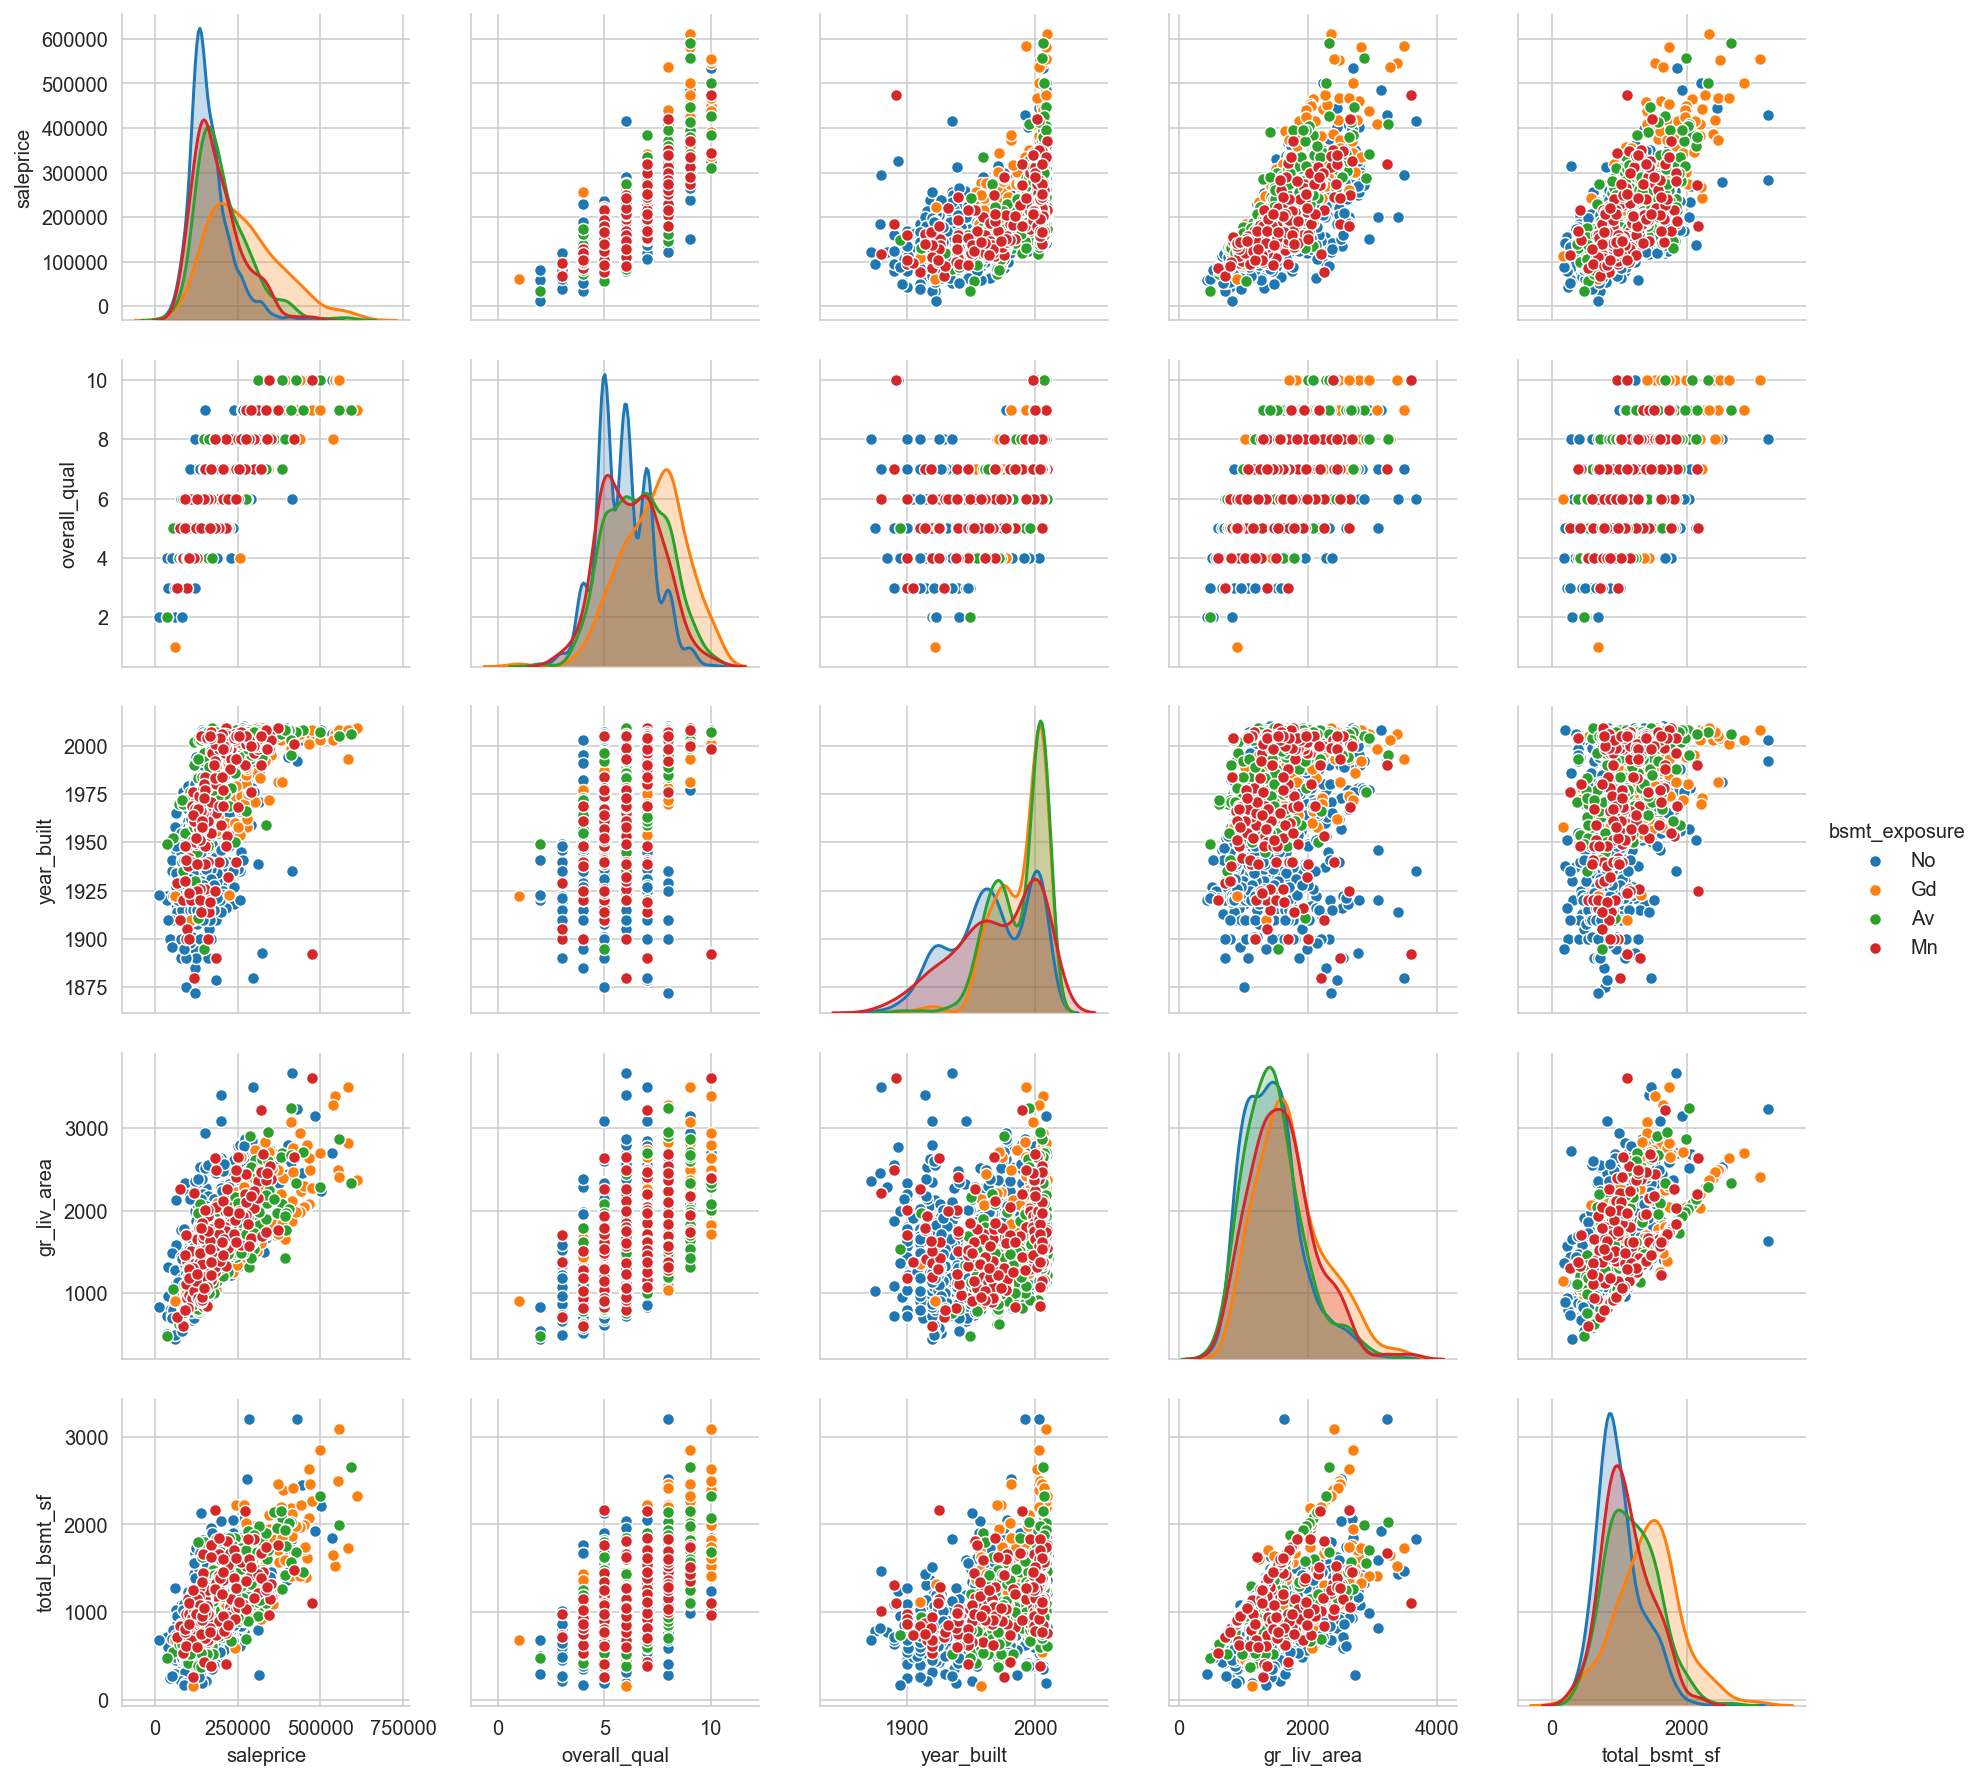

In [115]:
sns.pairplot(quant_land, hue='bsmt_exposure');

#### Access Variables Conclusion 
- Using modified in model: 
    - ms_zoning  - mapped to 'residential_low', 'floating_village', and 'residential_other'
    - land_contour - mapped to 'hillside' and 'banked'
    - lot_config - mapped to culdesac
    - bsmt_exposure - mapped to Gd = 1, all others = 0
- Not using in model: 
    - lot_shape
    - land_slope
    - bldg_type
    - foundation
    - bsmt_qual

In [116]:
housing_df_train.columns

Index(['utilities', 'neighborhood', 'overall_qual', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_cond',
       'bsmt_exposure', 'total_bsmt_sf', 'heating', 'heating_qc',
       'central_air', 'electrical', 'gr_liv_area', 'full_bath', 'kitchen_qual',
       'garage_area', 'paved_drive', 'misc_feature', 'sale_type', 'saleprice',
       'attached_garage', 'has_basement', 'offsite_feature', 'residential_low',
       'residential_other', 'floating_village', 'hillside', 'banked',
       'culdesac'],
      dtype='object')

## Utilities Variables EDA<a name="util"></a>

[back to top](#top)

In [117]:
features_util = ['utilities', 'heating', 'heating_qc', 'central_air', 
                   'electrical', 'saleprice']
util = housing_df_train[features_util]

In [118]:
quant_util = quant.join(util.drop(['saleprice'], axis=1), how='outer')

In [119]:
util.isnull().sum()

utilities      0
heating        0
heating_qc     0
central_air    0
electrical     0
saleprice      0
dtype: int64

In [120]:
util.groupby('utilities').saleprice.count()
util.groupby('utilities').saleprice.mean()

utilities
AllPub    181561.007816
NoSeWa    137500.000000
NoSewr     57625.000000
Name: saleprice, dtype: float64

In [121]:
# All but two are allpub, dropping
housing_df_train.drop(['utilities'], axis=1, inplace= True)

In [122]:
util.groupby('heating').saleprice.count()
# almost all Gas A
# util.groupby('heating').saleprice.mean()

heating
GasA    2016
GasW      20
Grav       5
OthW       2
Wall       6
Name: saleprice, dtype: int64

In [123]:
# Hardly any grav or wall but prices much lower. 
# Pairplot makes me believe the lower value of these homes will be covered by 
# overall qual and year built. Dropping
housing_df_train.drop(['heating'], axis=1, inplace= True)

In [124]:
util.groupby('heating_qc').saleprice.count()
# Ex = 1063, Gd = 319, Typical = 597, Fair = 67, Poor = 3
util.groupby('heating_qc').saleprice.mean()
quant_util.groupby('heating_qc').year_built.mean()
quant_util.groupby('heating_qc').overall_qual.mean()

heating_qc
Ex    6.748824
Fa    4.880597
Gd    5.711599
Po    3.333333
TA    5.331658
Name: overall_qual, dtype: float64

In [125]:
# Correlates to other variables a lot. Dropping. 
housing_df_train.drop(['heating_qc'], axis=1, inplace= True)

In [126]:
util.groupby('central_air').saleprice.count()

central_air
N     141
Y    1908
Name: saleprice, dtype: int64

In [127]:
# Pairplot shows that this indicates year better than saleprice. Dropping
housing_df_train.drop(['central_air'], axis=1, inplace= True)

In [128]:
util.groupby('electrical').saleprice.count()
# SBrkr = 1866, FuseA = 140, FuseF =35, FuseP = 7, Mix = 1
util.groupby('electrical').saleprice.mean()
quant_util.groupby('electrical').year_built.mean()
# quant_util.groupby('electrical').overall_qual.mean()

electrical
FuseA    1937.835714
FuseF    1935.428571
FuseP    1932.428571
Mix      1920.000000
SBrkr    1975.066988
Name: year_built, dtype: float64

In [129]:
# Correlates to other variables a lot. Dropping. 
housing_df_train.drop(['electrical'], axis=1, inplace= True)

/Users/mags/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/mags/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/mags/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/mags/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


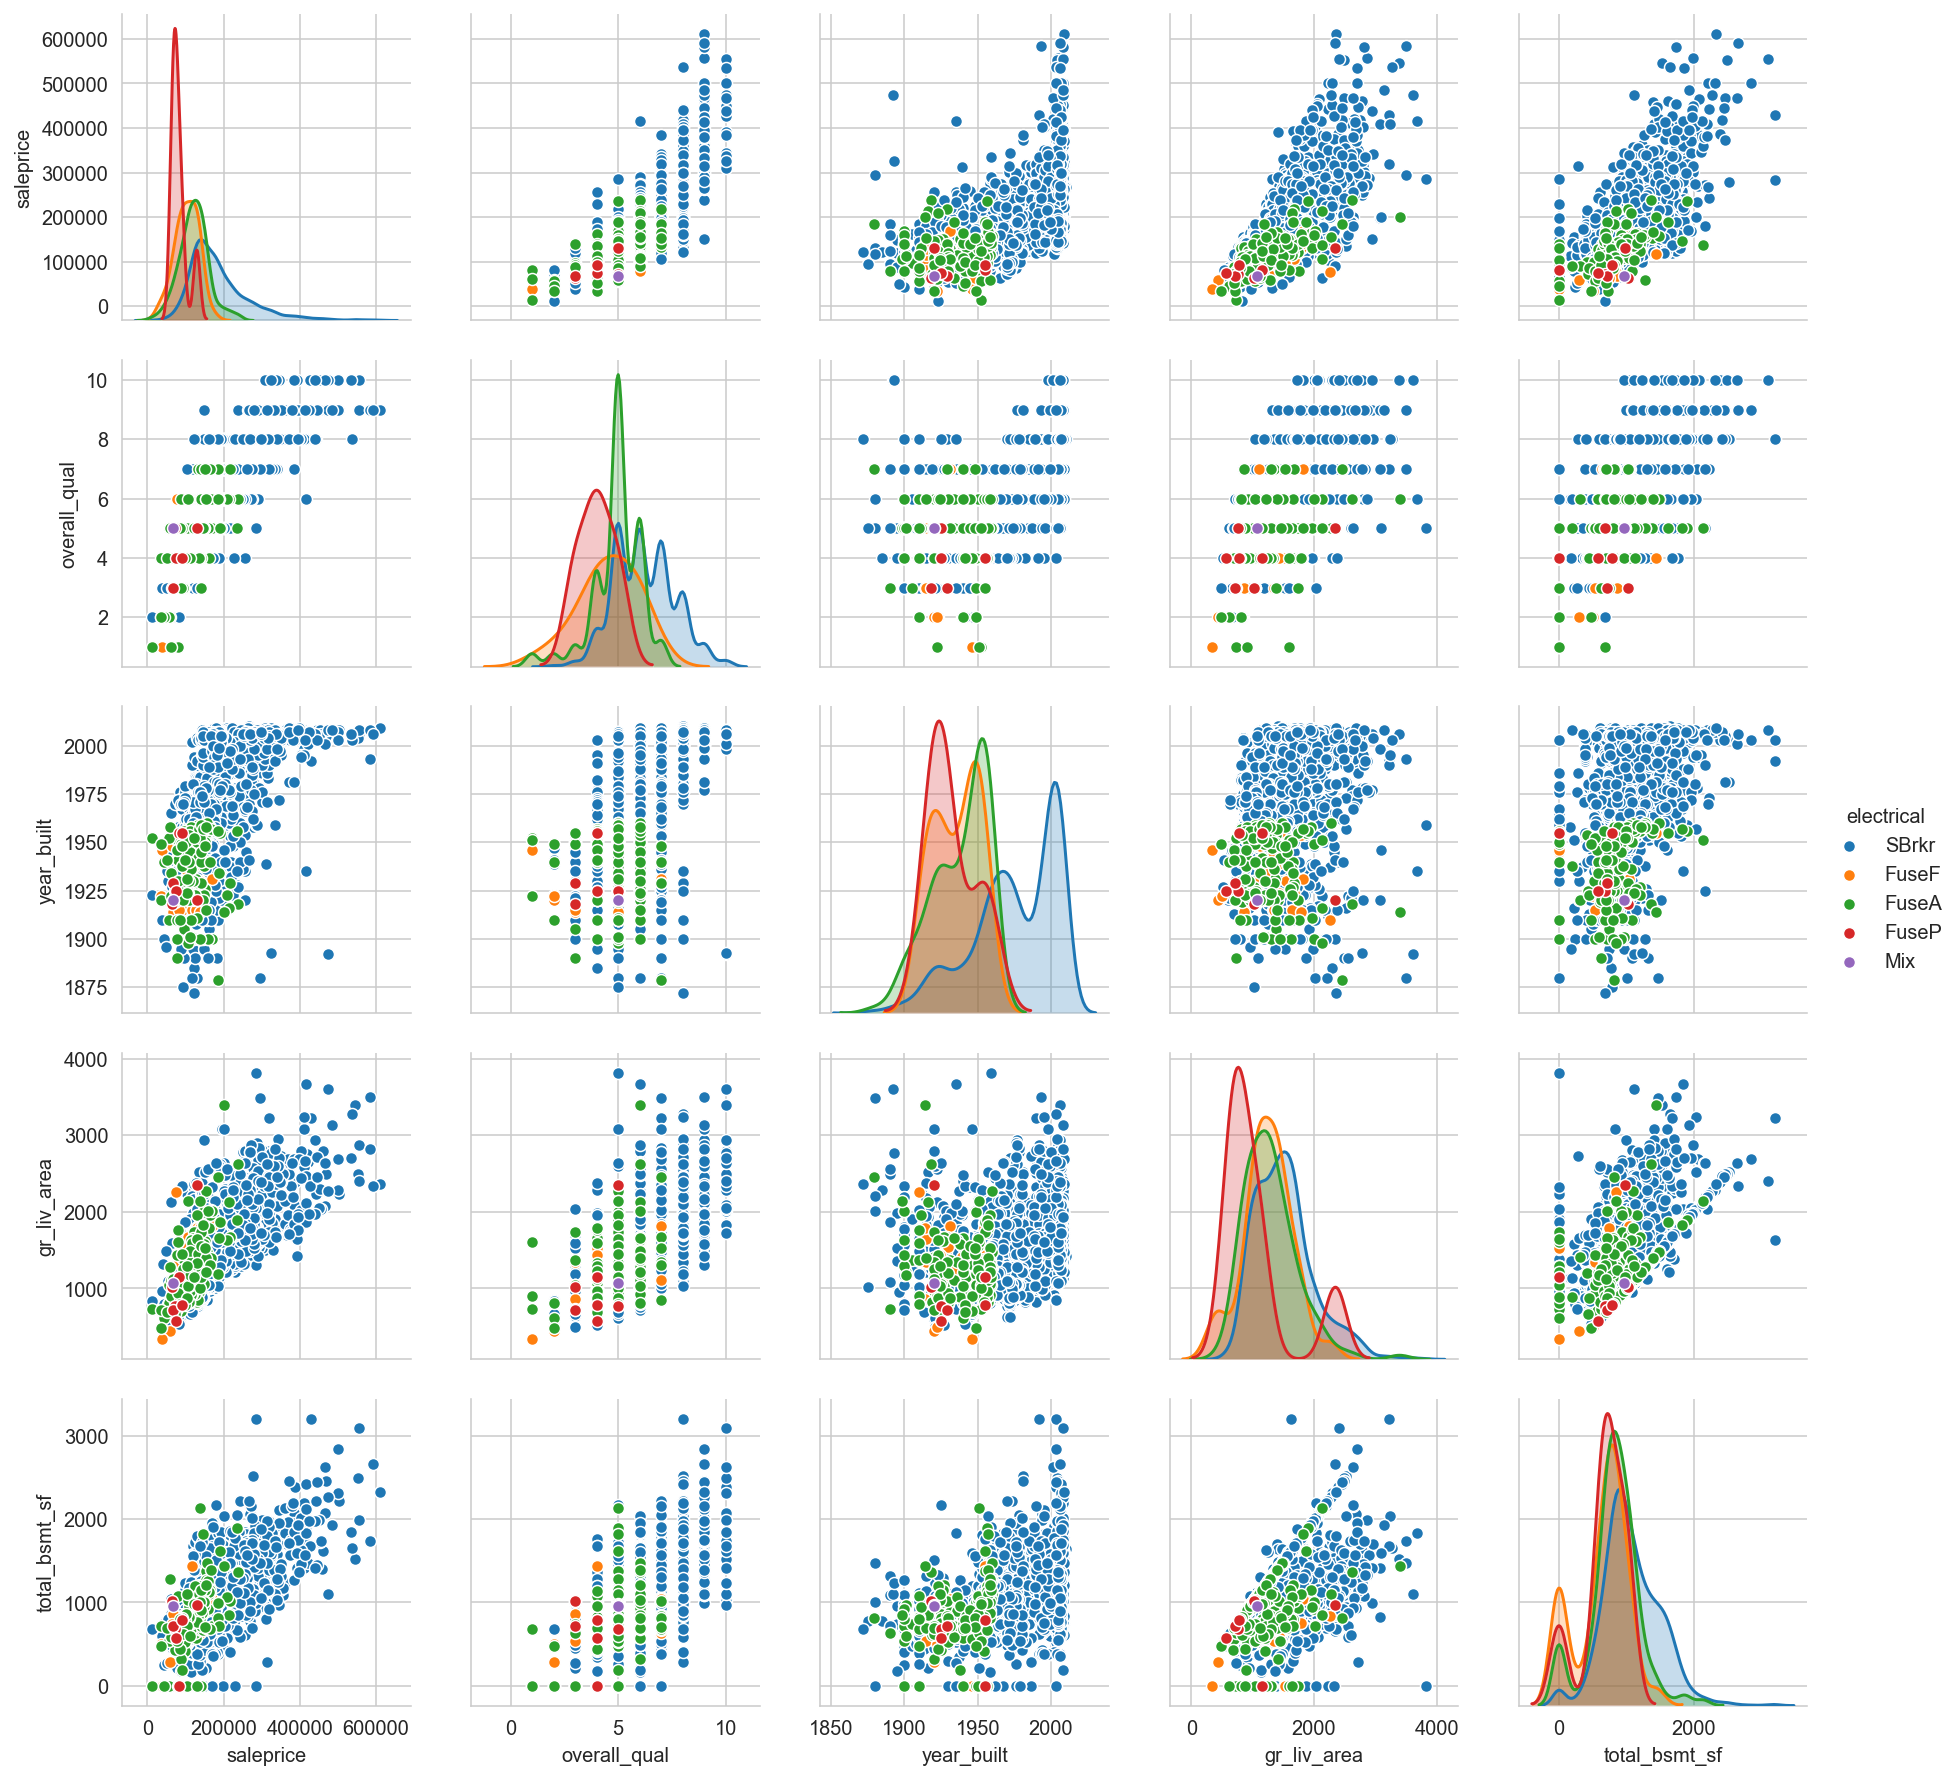

In [130]:
sns.pairplot(quant_util, hue='electrical');

#### Utilities Variables Conclusion 
- Not using in model: 
    - utilities
    - heating
    - heating_qc
    - central_air
    - electrical

## Remaining Variables EDA<a name="other"></a>

[back to top](#top)

In [131]:
features_other = [
    'neighborhood', #specific neighborhood, will want to map to other variables
    'year_built', # have established earlier this will be used
    'year_remod/add', # have not investigated specifically
    'roof_style', 
    'roof_matl',
    'exterior_1st', # exterior covering on house
    'exterior_2nd', # second materials if applicable
    'mas_vnr_type', # masonry veneer type
    'misc_feature',
    'sale_type',
    'saleprice']
other = housing_df_train[features_other]

In [132]:
quant_other = quant.join(other.drop(['saleprice', 'year_built'], axis=1), how='outer')

In [133]:
other.isnull().sum()

neighborhood         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type        22
misc_feature      1985
sale_type            0
saleprice            0
dtype: int64

In [134]:
quant_other.corr()

saleprice  overall_qual  year_built  gr_liv_area  \
saleprice        1.000000      0.803462    0.572405     0.719463   
overall_qual     0.803462      1.000000    0.602376     0.564933   
year_built       0.572405      0.602376    1.000000     0.257605   
gr_liv_area      0.719463      0.564933    0.257605     1.000000   
total_bsmt_sf    0.664819      0.552397    0.420493     0.409471   
year_remod/add   0.550872      0.584080    0.628613     0.323532   

                total_bsmt_sf  year_remod/add  
saleprice            0.664819        0.550872  
overall_qual         0.552397        0.584080  
year_built           0.420493        0.628613  
gr_liv_area          0.409471        0.323532  
total_bsmt_sf        1.000000        0.313637  
year_remod/add       0.313637        1.000000

In [135]:
# removing year_remod because it has a stronger correlation to year built than to saleprice
housing_df_train.drop(['year_remod/add'], axis=1, inplace= True)

In [136]:
other.groupby('roof_style').saleprice.count()
# Gable = 1619, Hip = 395, Rest 13 or fewer
other.groupby('roof_style').saleprice.mean()
other.groupby('roof_style').year_built.mean()
quant_other.groupby('roof_style').overall_qual.mean()

roof_style
Flat       6.076923
Gable      5.980235
Gambrel    5.416667
Hip        6.650633
Mansard    6.142857
Shed       6.666667
Name: overall_qual, dtype: float64

In [137]:
# Mapping to roof_style = 1 if Hip; 0 if anything else. 
housing_df_train['roof_style'] = housing_df_train.roof_style.map(
    {'Flat' : 0, 'Gable' : 0, 'Gambrel' : 0, 'Hip' : 1, 'Mansard' : 0, 'Shed' : 0})

In [138]:
other.groupby('roof_matl').saleprice.count()
# CompShg = 2024, Rest 15 or fewer
# other[other.roof_matl == "WdShngl"]

roof_matl
CompShg    2024
Membran       1
Tar&Grv      15
WdShake       4
WdShngl       5
Name: saleprice, dtype: int64

In [139]:
# Mapping to roof_matl = 1 if Wood; 0 if anything else. 
housing_df_train['roof_matl'] = housing_df_train.roof_matl.map(
    {'CompShg' : 0, 'Membran' : 0, 'Tar&Grv' : 0, 'WdShake' : 1, 'WdShngl' : 1})

In [140]:
housing_df_train['roof_matl'] = backup['Roof Matl'].map(
    {'CompShg' : 0, 'Membran' : 0, 'Tar&Grv' : 0, 'WdShake' : 1, 'WdShngl' : 1})

In [141]:
other.drop(to_drop).groupby('exterior_1st').saleprice.count().sort_values()
# VinySd = 724, MatalSd = 331, HdBoard = 300, Wd Sdng = 276, Plywood = 152, rest 89 or fewer
other.drop(to_drop).groupby('exterior_1st').saleprice.mean().sort_values()

# to_drop = []
# to_drop.append(other[other.exterior_1st == 'AsphShn'].index[0])
# to_drop.append(other[other.exterior_1st == 'ImStucc'].index[0])
# to_drop.append(other[other.exterior_1st == 'CBlock'].index[1])
# to_drop.append(other[other.exterior_1st == 'CBlock'].index[0])
# to_drop.append(other[other.exterior_1st == 'Stone'].index[1])
# to_drop.append(other[other.exterior_1st == 'Stone'].index[0])
# to_drop.append(other[other.exterior_1st == 'BrkComm'].index[1])
# to_drop.append(other[other.exterior_1st == 'BrkComm'].index[2])
# to_drop.append(other[other.exterior_1st == 'BrkComm'].index[0])
# other.drop(to_drop)

NameError: name 'to_drop' is not defined

In [ ]:
other.drop(to_drop).groupby('exterior_1st').year_built.mean().sort_values()

In [ ]:
quant_other.drop(to_drop).groupby('exterior_1st').overall_qual.mean().sort_values()

In [ ]:
# All relative means appear explainable by year built and overall qual. Dropping. 
housing_df_train.drop(['exterior_1st'], axis=1, inplace= True)

In [ ]:
other.groupby('exterior_2nd').saleprice.count().sort_values()
other[other.exterior_1st != other.exterior_2nd].count()
# only 317 homes have a different finish. 
other[other.exterior_1st != other.exterior_2nd].saleprice.mean()
# values of sale prices of a hoem with a second finish close to average
other[other.exterior_1st != other.exterior_2nd].groupby('exterior_2nd').saleprice.count().sort_values()
# different distiburtion from 1st finish

In [ ]:
other[other.exterior_1st != other.exterior_2nd].groupby('exterior_2nd').saleprice.mean().sort_values()

In [ ]:
other[other.exterior_1st != other.exterior_2nd].groupby('exterior_2nd').year_built.mean().sort_values()

In [ ]:
# Still appears to be explainable by year built. Dropping. 

housing_df_train.drop(['exterior_2nd'], axis=1, inplace= True)

In [ ]:
other.groupby('mas_vnr_type').saleprice.count()
# None: 1218, BrkFace : 630, Stone : 166, BrkCmn : 13, Null: 22
other.mas_vnr_type.isnull().sum()

other.groupby('mas_vnr_type').saleprice.mean()
# Stone raises the value most (264k), followed by BrkFace (212k)
other[other.mas_vnr_type.isnull()].saleprice.mean()
# null values are above average @ 234k, but "None" lowers value at 154k

In [ ]:
# information doesn't seem logical/useful. Dropping. 
housing_df_train.drop(['mas_vnr_type'], axis=1, inplace= True)

In [ ]:
other.groupby('misc_feature').saleprice.count()
# Shed 56, Gar2 4, Othr 3, TenC 1

other.groupby('misc_feature').saleprice.mean()

In [ ]:
# the only feature that moves away from the mean is tennis court and there's only one of those
# Dropping. 
housing_df_train.drop(['misc_feature'], axis=1, inplace= True)

In [1]:
other.groupby('sale_type').saleprice.count()
# WD: 1781, New: 158, COD: 63, Rest 17 or fewer

# other.groupby('sale_type').saleprice.mean().sort_values()

NameError: name 'other' is not defined

In [356]:
quant_other.groupby('sale_type').overall_qual.mean().sort_values()

sale_type
Oth      4.500000
ConLD    4.882353
ConLw    5.200000
COD      5.349206
WD       6.003930
CWD      6.500000
ConLI    6.571429
Con      6.750000
New      7.727848
Name: overall_qual, dtype: float64

In [357]:
# differences in means seem explained by other variables. Dropping
housing_df_train.drop(['sale_type'], axis=1, inplace= True)

In [362]:
# Creating a new df to determine what neighborhoods seem to stick out as outliers to input data about the homes
neighborhood = pd.DataFrame()

In [373]:
neighborhood['count'] = other.groupby('neighborhood').saleprice.count()
neighborhood['mean'] = other.groupby('neighborhood').saleprice.mean()
neighborhood['qual'] = quant_other.groupby('neighborhood').overall_qual.mean()
neighborhood['year'] = quant_other.groupby('neighborhood').year_built.mean()
neighborhood['size'] = quant_other.groupby('neighborhood').gr_liv_area.mean()

In [ ]:
neighborhood

In [387]:
# neighborhood.sort_values('mean')

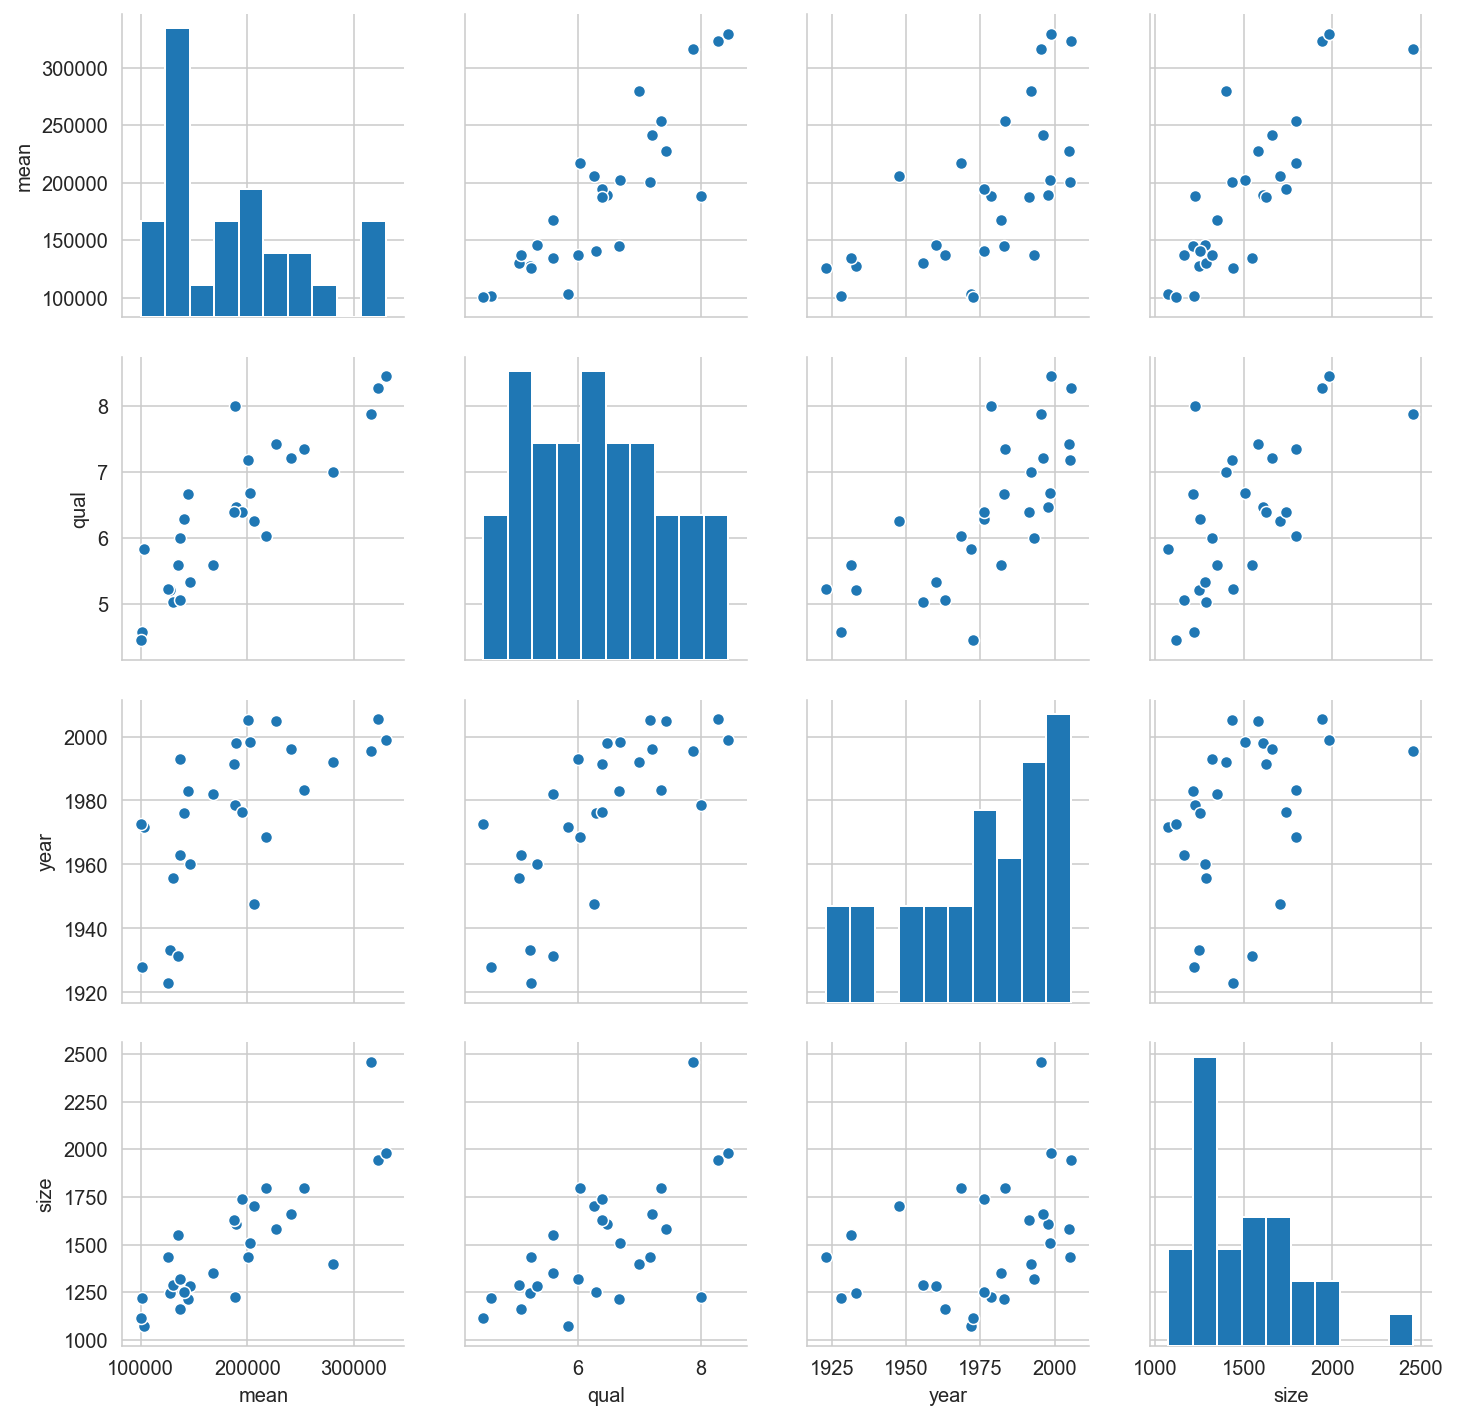

In [376]:
sns.pairplot(neighborhood.drop('count', axis=1));

In [ ]:
# Selecting outlier neighborhoods from above plot: 

# NoRidge - Avg Size is much higher and other values don't track indicating that additional area doesn't 
# increase price or quality in this neighborhood. 

# NridgHt - Higher Quality Rating at lower sizes. Indicating we may want to separate it.

# Greens also looks like an outlier qual vs mean but only has 3 samples so will not break out as dummy.

# Pulling from next pairplot other neighborhoods with minimal data.

# Second run of pairplot implies BrDale may also be an outlier. 

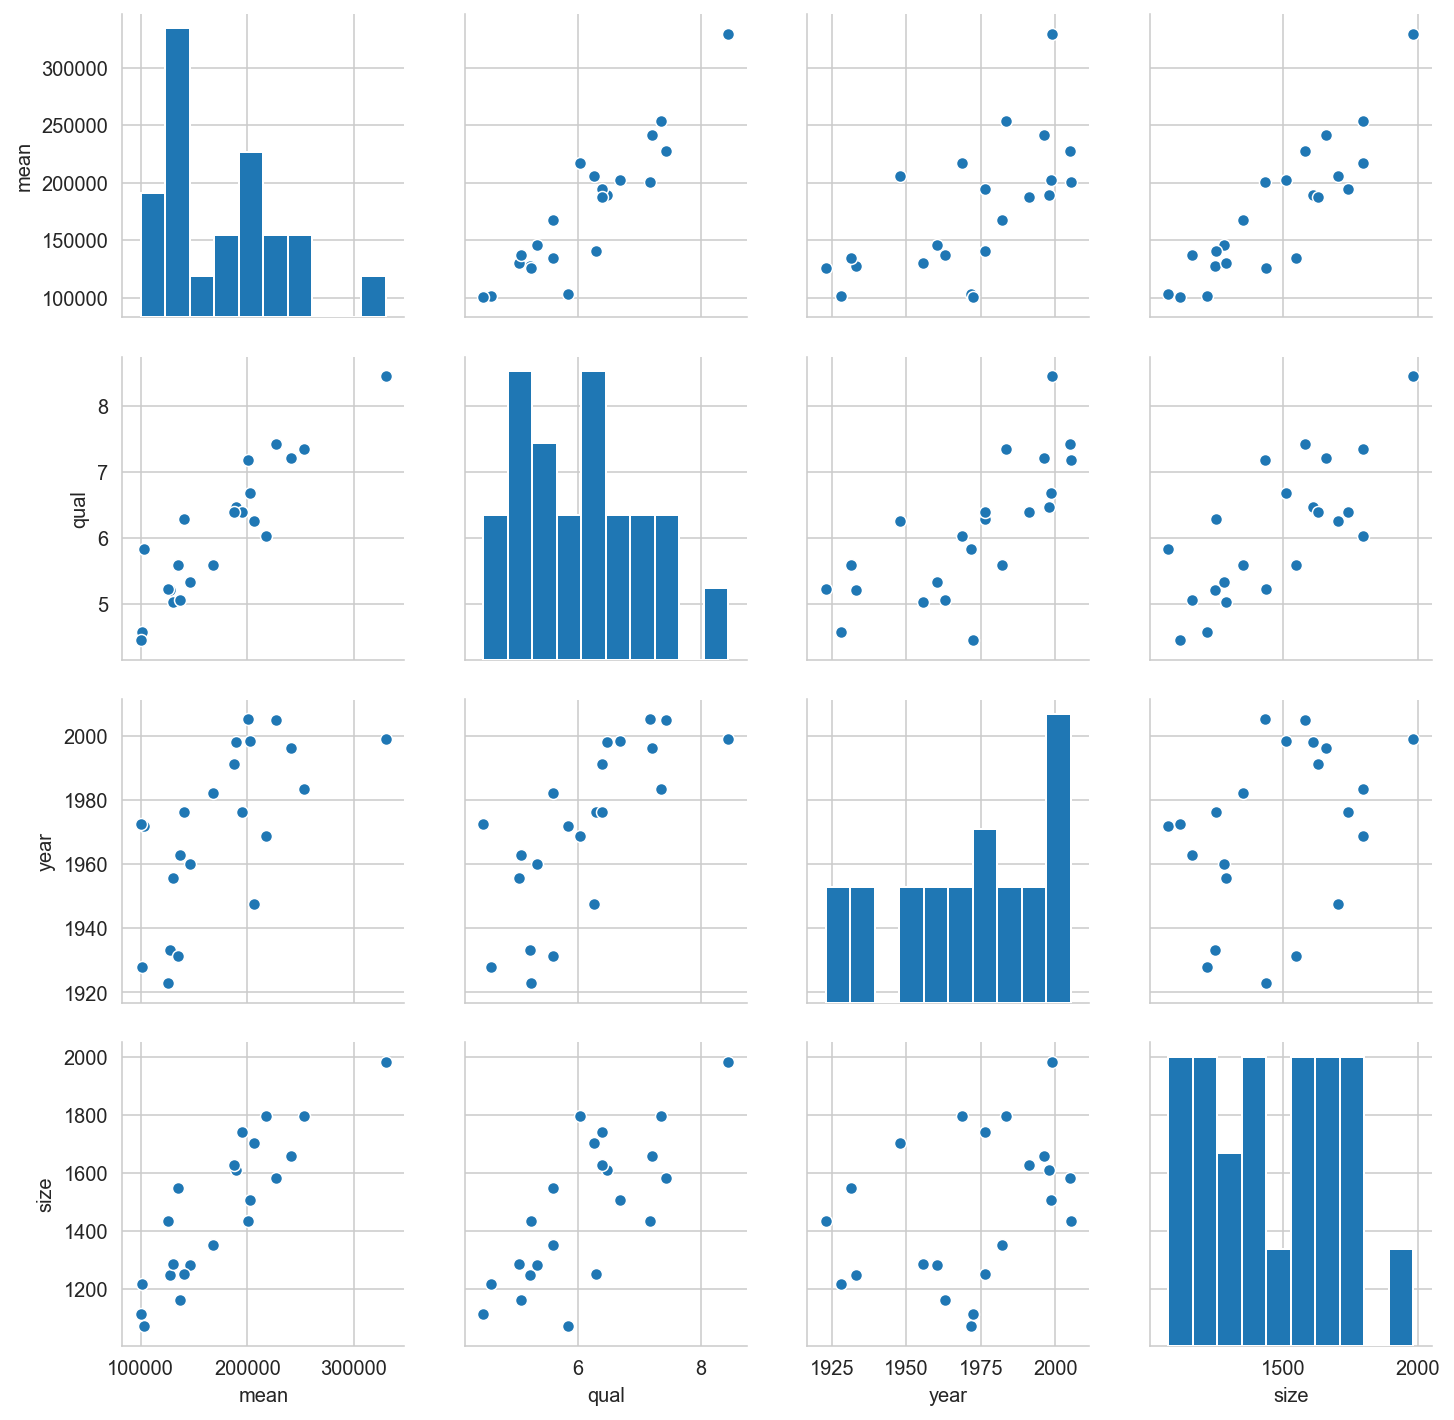

In [380]:
# sns.pairplot(neighborhood.drop('count', axis=1).drop(['NoRidge', 'NridgHt', \
#                                                       'Greens', 'GrnHill', 'Blueste', 'Landmrk']));

In [384]:
# Mapping Dummy Variables for NoRidge, NridgeHt, BrDale. Ignoring all other neighborhoods.

housing_df_train['northridge'] = housing_df_train.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 0, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 1, 'NridgHt' : 0, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})

In [385]:
housing_df_train['northridge_hts'] = housing_df_train.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 0, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 0, 'NridgHt' : 1, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})

In [386]:
housing_df_train['briardale'] = housing_df_train.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 1, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 0, 'NridgHt' : 0, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})

In [388]:
housing_df_train.drop(['neighborhood'], axis=1, inplace= True)

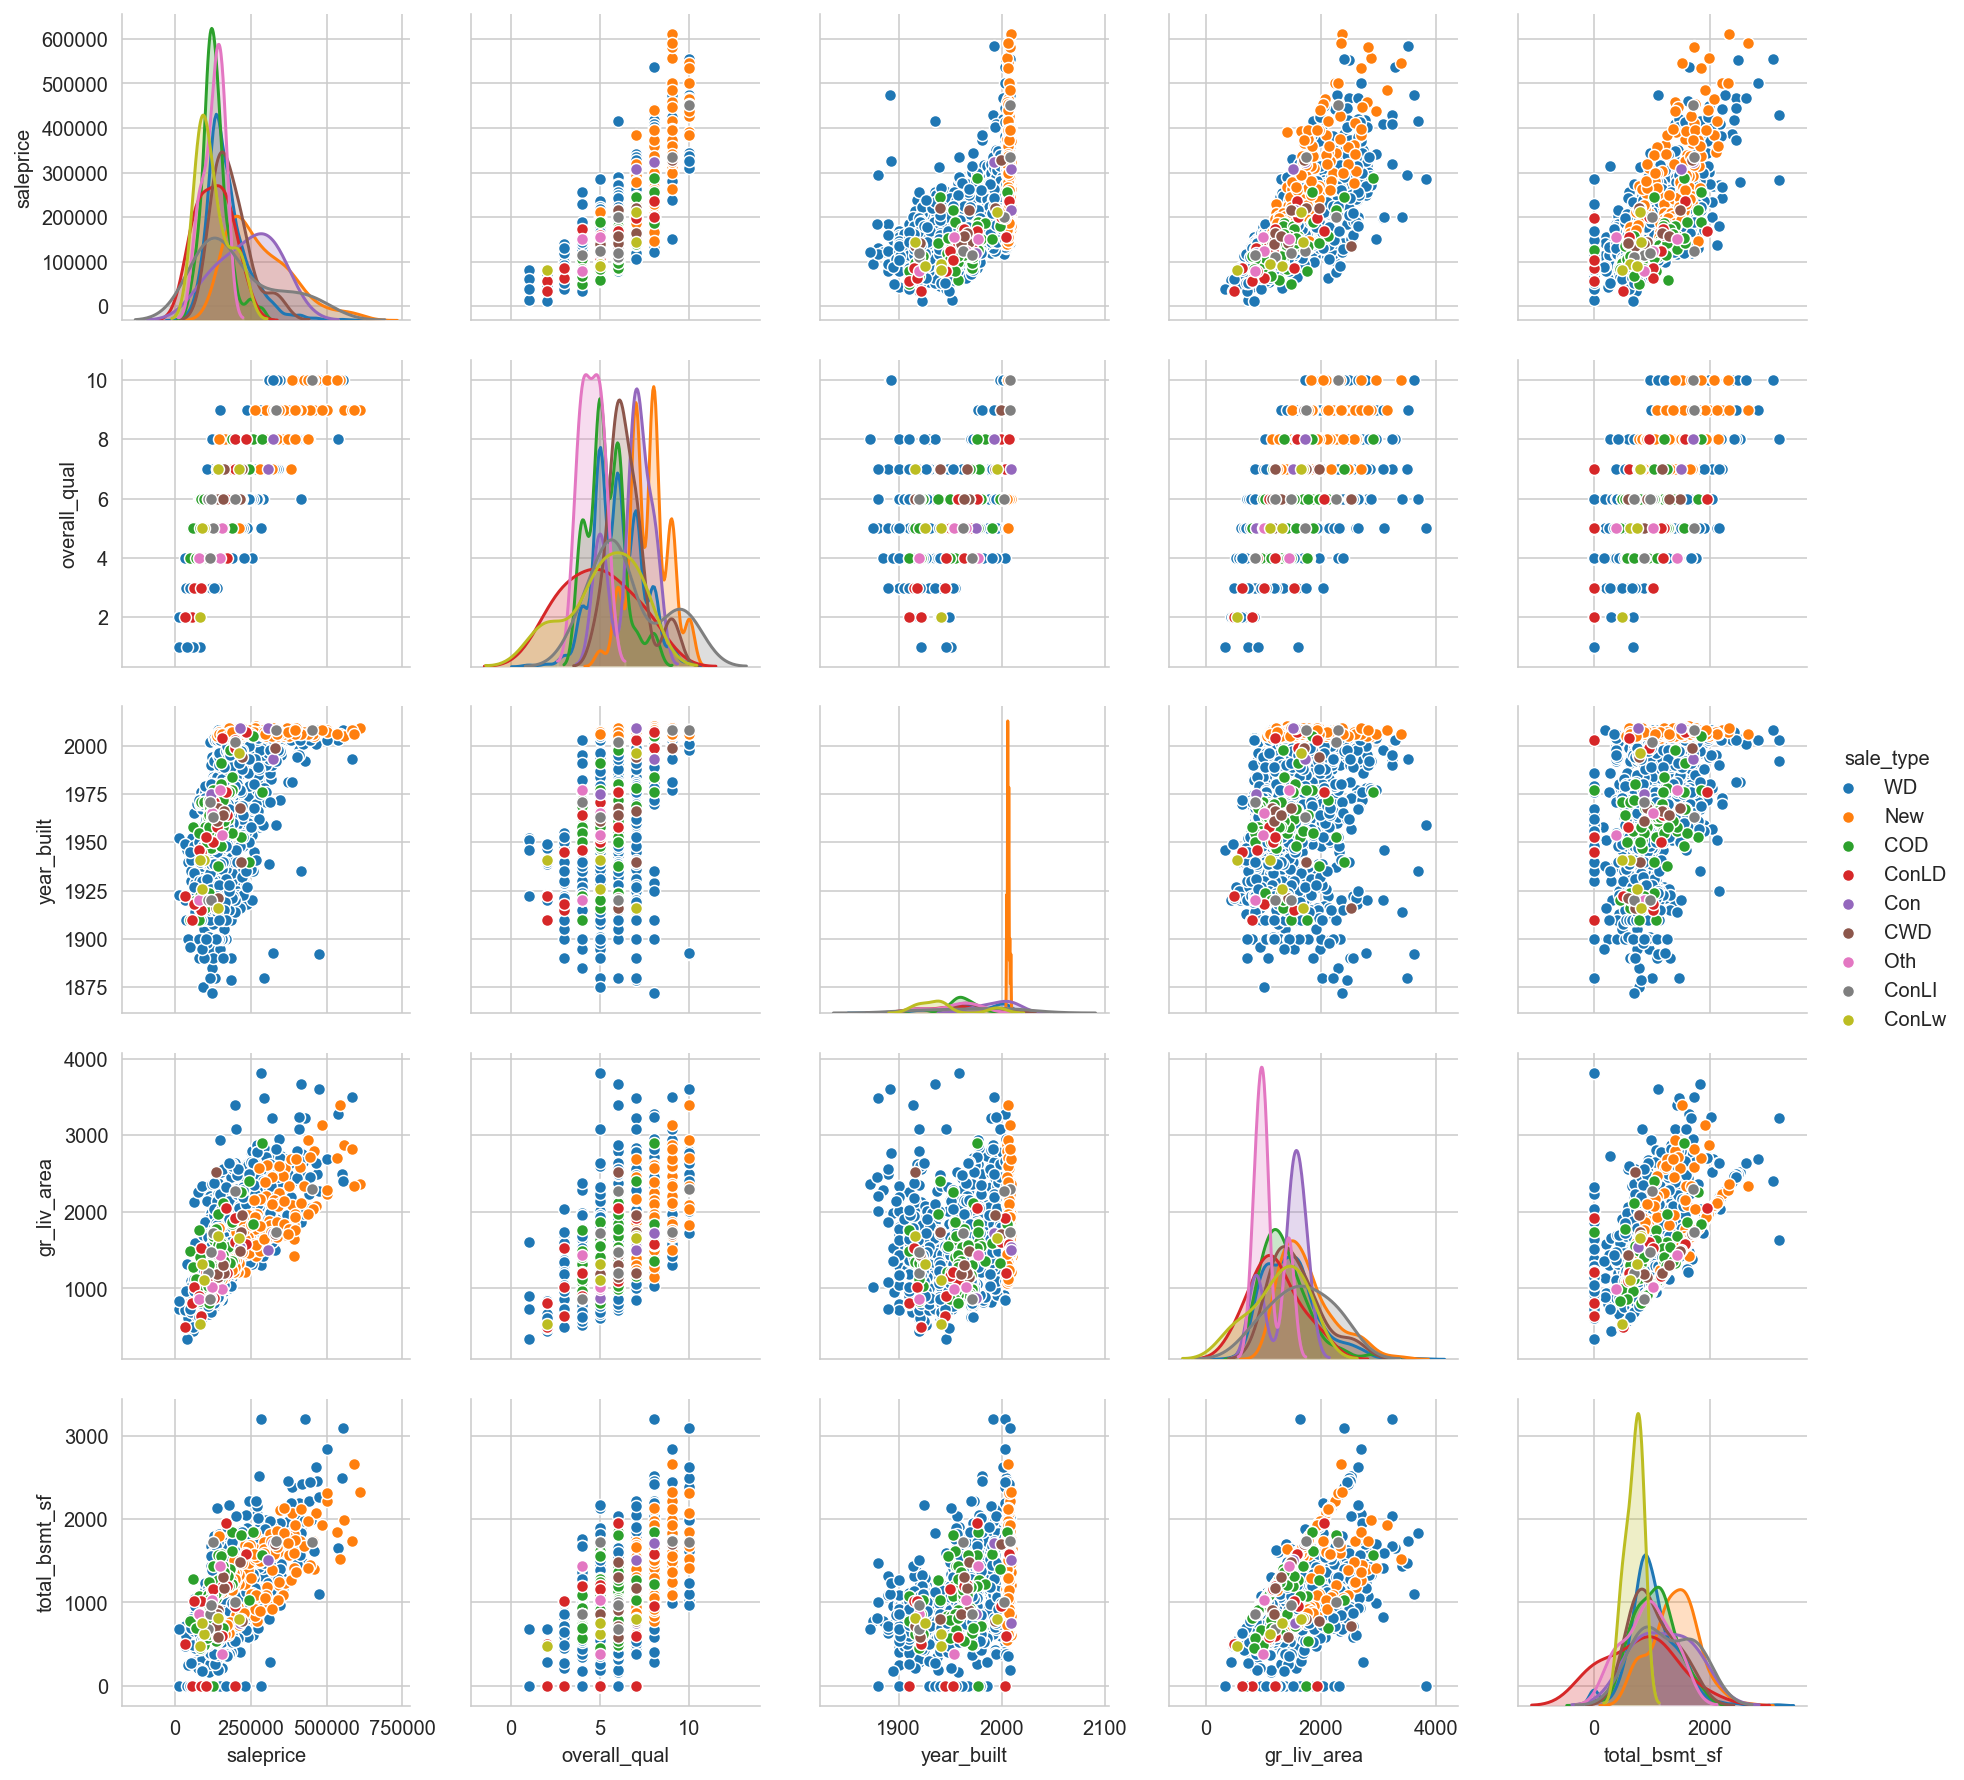

In [354]:
# Pairplot used to set hue to various categories
# sns.pairplot(quant_other.drop('year_remod/add', axis=1), hue='sale_type');

#### Remaining Variables Conclusion 
- Definitely using in model: 
    - year_built
- Using modified in model: 
    - roof_style - mapped to Hip = 1, others = 0
    - roof_matl - mapped to WdShngl = 1, WdShake = 1, others = 0
    - neighborhood - mapped to 3 dummy variables : northridge, northridge_hts, briardale
- Not using in model: 
    - sale_type
    - year_remod/add
    - exterior_1
    - exterior_2
    - mas_vnr_type
    - misc_feature
    - sale_type

## Modifying Test Data Set per Train Data Changes <a name="test"></a>

[back to top](#top)

In [264]:
# Carrying over dummy variables and mapped values to test data set:
housing_df_test['attached_garage'] = housing_df_test.garage_type.map(
    {'BuiltIn': 1, 'Attchd': 1, '2Types' : 0, 'Basment' : 0, 'CarPort' : 0, 'Detchd' : 0, None : 0})
housing_df_test['exter_cond'] = housing_df_test.exter_cond.map(
    {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})
housing_df_test['has_basement'] = housing_df_test['BsmtFin Type 1'].isnull()
housing_df_test['has_basement'] = housing_df_test.has_basement.map(
    {False : 1, True : 0})
housing_df_test['kitchen_qual'] = housing_df_test.kitchen_qual.map(
    {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'Po' : 0})

In [389]:
housing_df_test['offsite_feature'] = housing_df_test.condition_1.map(
    {'Artery' : 0, 'Feedr' : 0, 'Norm' : 0, 
     'PosA' : 1, 'PosN' : 1, 'RRAe' : 0, 'RRAn' : 0, 
     'RRNe' : 0, 'RRNn' : 0})
housing_df_test['paved_drive'] = housing_df_test.paved_drive.map(
    {'N' : 0, 'P' : 0, 'Y' : 1})
housing_df_test['residential_low'] = housing_df_test.ms_zoning.map(
    {'RL' : 1, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 0, 'I (all)' : 0, 'RH' : 0, 'RM' : 0})
housing_df_test['residential_other'] = housing_df_test.ms_zoning.map(
    {'RL' : 0, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 0, 'I (all)' : 0, 'RH' : 1, 'RM' : 1})
housing_df_test['floating_village'] = housing_df_test.ms_zoning.map(
    {'RL' : 0, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 1, 'I (all)' : 0, 'RH' : 0, 'RM' : 0})
housing_df_test['hillside'] = housing_df_test.land_contour.map(
    {'Bnk' : 0, 'HLS' : 1, 'Low' : 0, 'Lvl' : 0})
housing_df_test['banked'] = housing_df_test.land_contour.map(
    {'Bnk' : 1, 'HLS' : 0, 'Low' : 0, 'Lvl' : 0})
housing_df_test['culdesac'] = housing_df_test.lot_config.map(
    {'Corner' : 0, 'CulDSac' : 1, 'FR2' : 0, 'FR3' : 0, 'Inside' : 0})
housing_df_test['bsmt_exposure'] = housing_df_test.bsmt_exposure.map(
    {'Av' : 0, 'Gd' : 1, 'Mn' : 0, 'No' : 0, None : 0})
housing_df_test['roof_style'] = housing_df_test.roof_style.map(
    {'Flat' : 0, 'Gable' : 0, 'Gambrel' : 0, 'Hip' : 1, 'Mansard' : 0, 'Shed' : 0})
housing_df_test['roof_matl'] = housing_df_test.roof_matl.map(
    {'CompShg' : 0, 'Membran' : 0, 'Tar&Grv' : 0, 'WdShake' : 1, 'WdShngl' : 1})
housing_df_test['northridge'] = housing_df_test.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 0, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 1, 'NridgHt' : 0, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})
housing_df_test['northridge_hts'] = housing_df_test.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 0, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 0, 'NridgHt' : 1, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})
housing_df_test['briardale'] = housing_df_test.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 1, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 0, 'NridgHt' : 0, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})

In [432]:
housing_df_test['attached_garage'][housing_df_test['attached_garage'].isnull()] = 0
housing_df_test['bsmt_exposure'][housing_df_test['bsmt_exposure'].isnull()] = 0

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports unti

In [456]:
final_columns = list(housing_df_train.columns)

In [457]:
test_columns = list(housing_df_test.columns)

In [458]:
to_drop_test = [column for column in test_columns if column not in final_columns]

In [459]:
housing_df_test.drop(to_drop_test, axis=1, inplace=True)

In [499]:
housing_df_test = housing_df_test.join(backup_test['Id'])

## Cleaning data sets <a name="clean"></a>

In [446]:
housing_df_train.isnull().sum()

overall_qual         0
year_built           0
roof_style           0
roof_matl            0
mas_vnr_area         0
exter_cond           0
bsmt_exposure        0
total_bsmt_sf        0
gr_liv_area          0
full_bath            0
kitchen_qual         0
garage_area          0
paved_drive          0
saleprice            0
has_basement         0
attached_garage      0
offsite_feature      0
residential_low      0
residential_other    0
floating_village     0
hillside             0
banked               0
culdesac             0
northridge           0
northridge_hts       0
briardale            0
dtype: int64

In [487]:
housing_df_test.isnull().sum()

overall_qual         0
year_built           0
roof_style           0
roof_matl            0
mas_vnr_area         0
exter_cond           0
bsmt_exposure        0
total_bsmt_sf        0
gr_liv_area          0
full_bath            0
kitchen_qual         0
garage_area          0
paved_drive          0
attached_garage      0
has_basement         0
offsite_feature      0
residential_low      0
residential_other    0
floating_village     0
hillside             0
banked               0
culdesac             0
northridge           0
northridge_hts       0
briardale            0
dtype: int64

In [486]:
backup_test[housing_df_test['roof_matl'].isnull()]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, has_basement]
Index: []

[0 rows x 81 columns]

In [485]:
housing_df_test['kitchen_qual'][housing_df_test['kitchen_qual'].isnull()] = 0

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [483]:
housing_df_test['roof_matl'][housing_df_test['roof_matl'].isnull()] = 0

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [435]:
housing_df_train[housing_df_train.mas_vnr_area.isnull()].head()

overall_qual  year_built  roof_style  roof_matl  mas_vnr_area  \
22              8        2005         0.0          0           NaN   
41             10        2006         0.0          0           NaN   
86              7        2003         0.0          0           NaN   
212             7        2008         0.0          0           NaN   
276             6        2002         0.0          0           NaN   

     exter_cond  bsmt_exposure  total_bsmt_sf  gr_liv_area  full_bath  ...  \
22            3            0.0         1209.0         2253          2  ...   
41            3            0.0         2076.0         2076          2  ...   
86            3            0.0         1176.0         1200          2  ...   
212           3            0.0         1436.0         1436          2  ...   
276           3            0.0          914.0          914          1  ...   

     offsite_feature  residential_low  residential_other  floating_village  \
22                 0                1                  0                 0   
41                 0                1                  0                 0   
86                 0                1                  0                 0   
212                0                0                  0                 1   
276                0                1                  0                 0   

     hillside  banked  culdesac  northridge  northridge_hts  briardale  
22          0       0         0           0               1          0  
41          0       0         0           0               1          0  
86          0       0         0           0               0          0  
212         0       0         0           0               0          0  
276         0       0         0           0               0          0  

[5 rows x 26 columns]

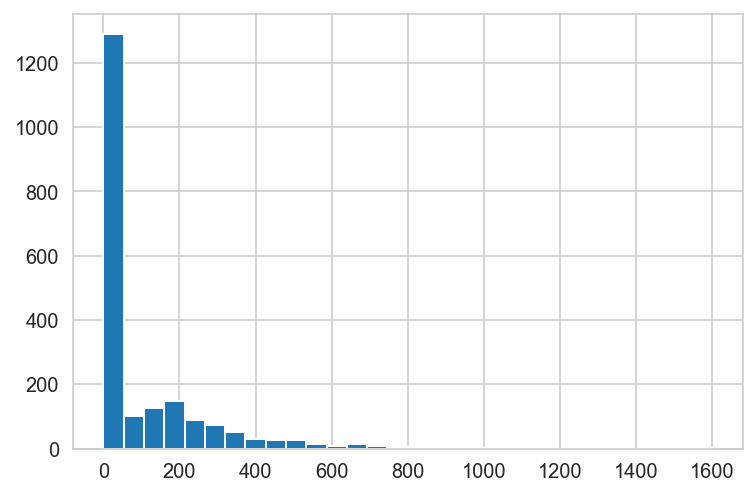

In [437]:
plt.hist(housing_df_train.mas_vnr_area, bins=30);

In [439]:
# Per histogram, presume NaN values refer to 0 area. 
housing_df_train['mas_vnr_area'][housing_df_train.mas_vnr_area.isnull()] = 0 

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [440]:
housing_df_test['mas_vnr_area'][housing_df_test.mas_vnr_area.isnull()] = 0 

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [444]:
housing_df_train['garage_area'][housing_df_train.garage_area.isnull()] = 0 
housing_df_test['garage_area'][housing_df_test.garage_area.isnull()] = 0 

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [445]:
housing_df_train['total_bsmt_sf'][housing_df_train.total_bsmt_sf.isnull()] = 0 
housing_df_test['total_bsmt_sf'][housing_df_test.total_bsmt_sf.isnull()] = 0 

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
housing_df_train['bsmt_exposure'][land.bsmt_exposure == 'Gd'] = 1

## Saving Cleaned Data Sets

[back to top](#top)

In [507]:
housing_df_train.to_csv('./datasets/train_clean.csv')

In [500]:
housing_df_test.to_csv('./datasets/test_clean.csv')